In [64]:
#라이브러리불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [65]:
#CSV파일 경로설정후 판다스로 불러오기
import os
csv_path =  "Pokemon.csv"
original_data = pd.read_csv(csv_path)
print('슝=3')

슝=3


In [66]:
#원본데이터를 복사하여 사용하기
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [67]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       95      125     85           1       True  
1      125       90    100           1       True  
2      125       85     90           1       True  
3      154       90    130           1       True  
4      154      100    130           1       True

In [68]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon['Legendary']==False].reset_index(drop=False)
print(ordinary.shape)
ordinary.head()

(735, 14)


index  #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0      0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1      1  2                Ivysaur  Grass  Poison    405  60      62       63   
2      2  3               Venusaur  Grass  Poison    525  80      82       83   
3      3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4      4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [69]:
#결측치확인
pokemon.isnull().sum()
#전체컬럼개수와 컬럼출력
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

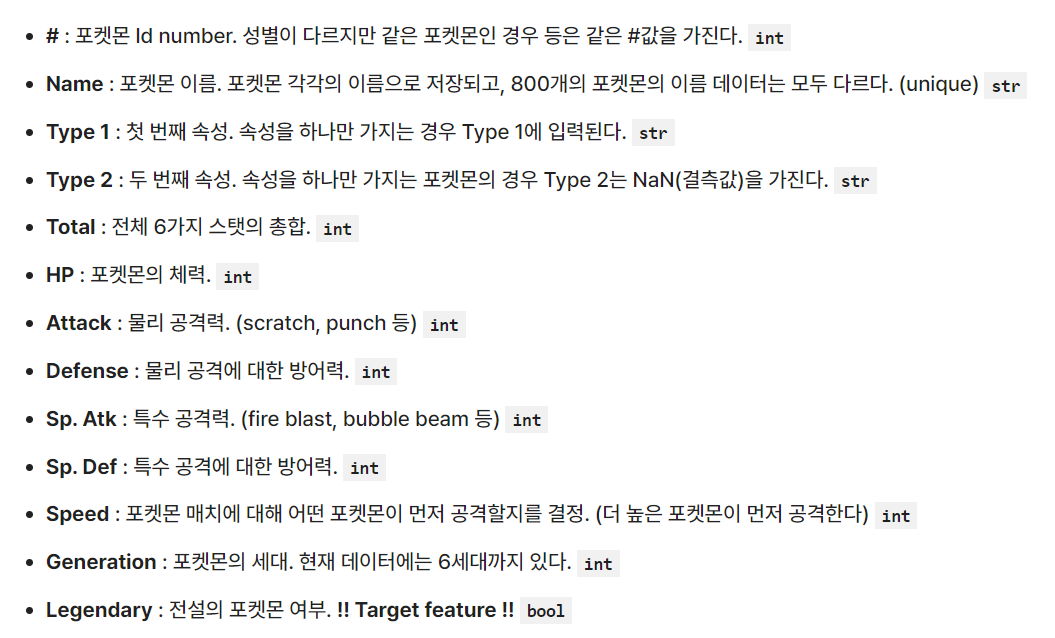

In [70]:
# # : ID number확인하기
len(set(pokemon["#"])) #전체데이터800개중 #:ID number값은721개로 중복하는 데이터들이있을을 알수있다 이데이터는 unique하지않아index사용이 불가하다.
pokemon[pokemon["#"] == 6] #6인값 확인해보기
#charizard,CharizardMega Charizard X,CharizardMega Charizard Y는 같은값의#를가진다
# Charizard에서 진화한CharizardMega Charizard X,CharizardMega Charizard Y가있고 x,y버전을 가진다.

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
6      109       85    100           1      False  
7      130       85    100           1      False  
8      159      115    100           1      False

In [71]:
#Name:이름
len(set(pokemon['Name']))#pokemon['Name']을집합으로 만들어서 중복데이터를 날린후 unique한 이름의 개수를 알수있다.

800

In [72]:
#pokemon의 속성 알아보기
pokemon.loc[[6, 10]]
#각 속성의 종류는 몇가지인지 개수알아보기
len(set(pokemon["Type 1"])), len(set(pokemon["Type 2"]))
#차집합을 사용하여 둘의 차이가있는 값 알아보기
set(pokemon["Type 2"]) - set(pokemon["Type 1"])
#결측치가 있는 값으로 인해 차이가있다.

{nan}

In [73]:
#pokemon의 모든타입을 변수에 저장
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Ice', 'Fighting', 'Normal', 'Rock', 'Flying', 'Ground', 'Psychic', 'Fairy', 'Poison', 'Electric', 'Grass', 'Bug', 'Water', 'Ghost', 'Dragon', 'Dark', 'Fire', 'Steel']


In [74]:
#type을 하나만 가지고있는 포켓몬은 몇마린지 알아보기.(type2가 nan값은 포켓몬)
pokemon["Type 2"].isna().sum()


386

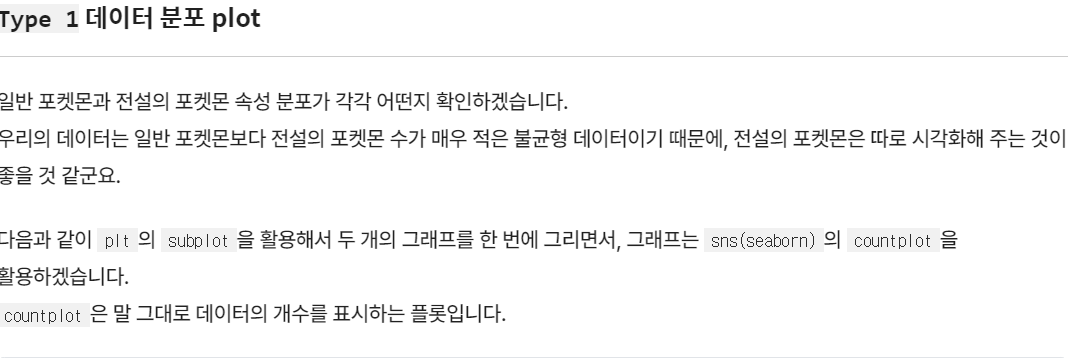

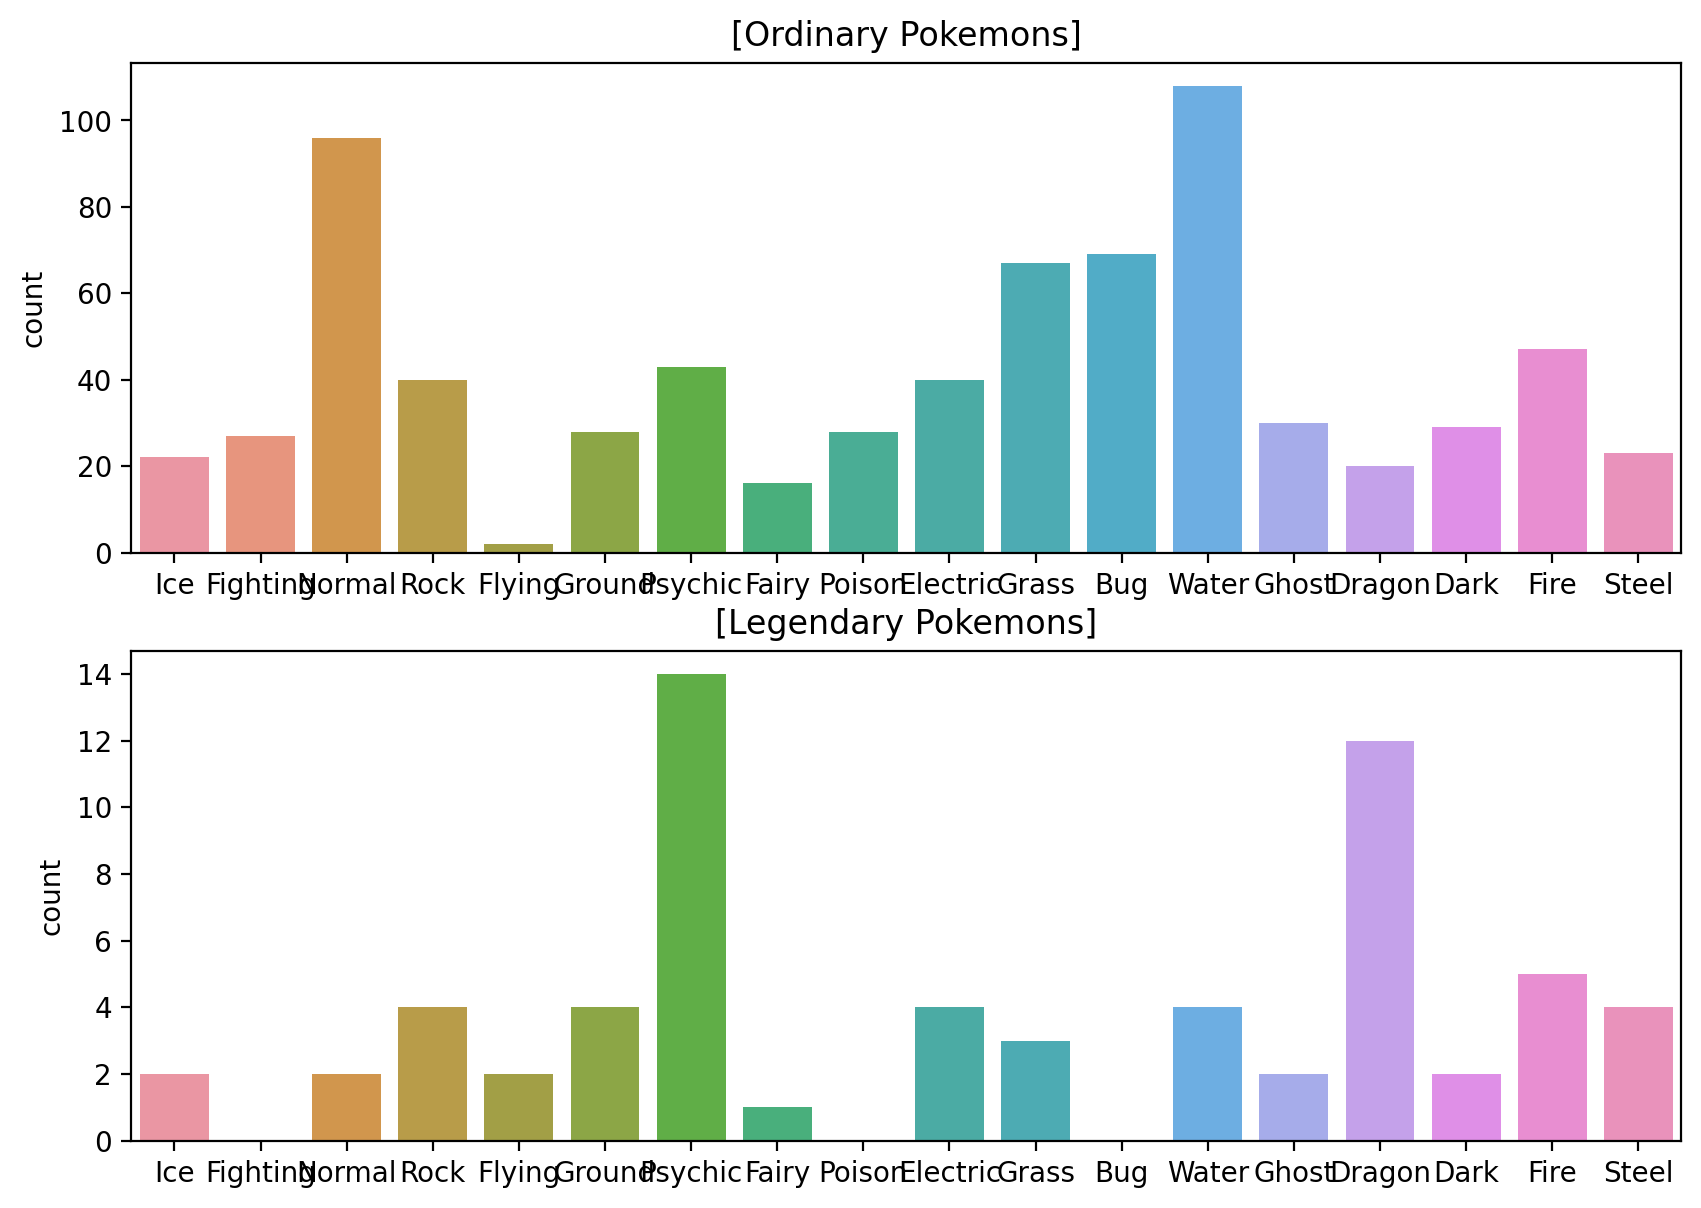

In [75]:
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()
#- 일반 포켓몬에는 물(Water) 속성, 노말(Normal) 속성, 벌레(Bug) 속성 등이 많습니다.
#- 반면, 전설의 포켓몬에는 드래곤(Dragon) 속성, 에스퍼(Psychic) 속성이 많습니다.

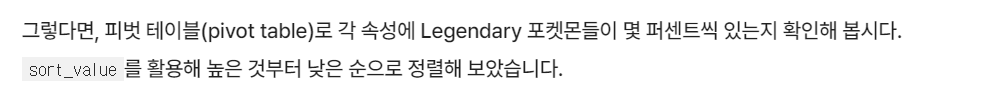

In [76]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)
#Legendary pokemon의 Type1속성은 flying이 가장 높은 비율인것을 알수있다.

Legendary
Type 1             
Flying     0.500000
Dragon     0.375000
Psychic    0.245614
Steel      0.148148
Ground     0.125000
Fire       0.096154
Electric   0.090909
Rock       0.090909
Ice        0.083333
Dark       0.064516
Ghost      0.062500
Fairy      0.058824
Grass      0.042857
Water      0.035714
Normal     0.020408
Poison     0.000000
Fighting   0.000000
Bug        0.000000

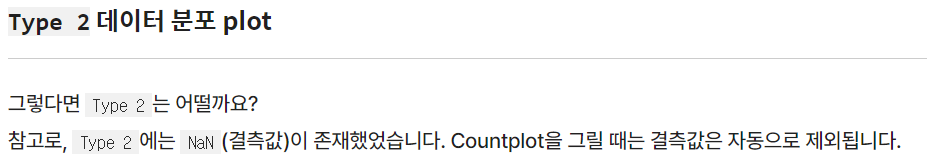

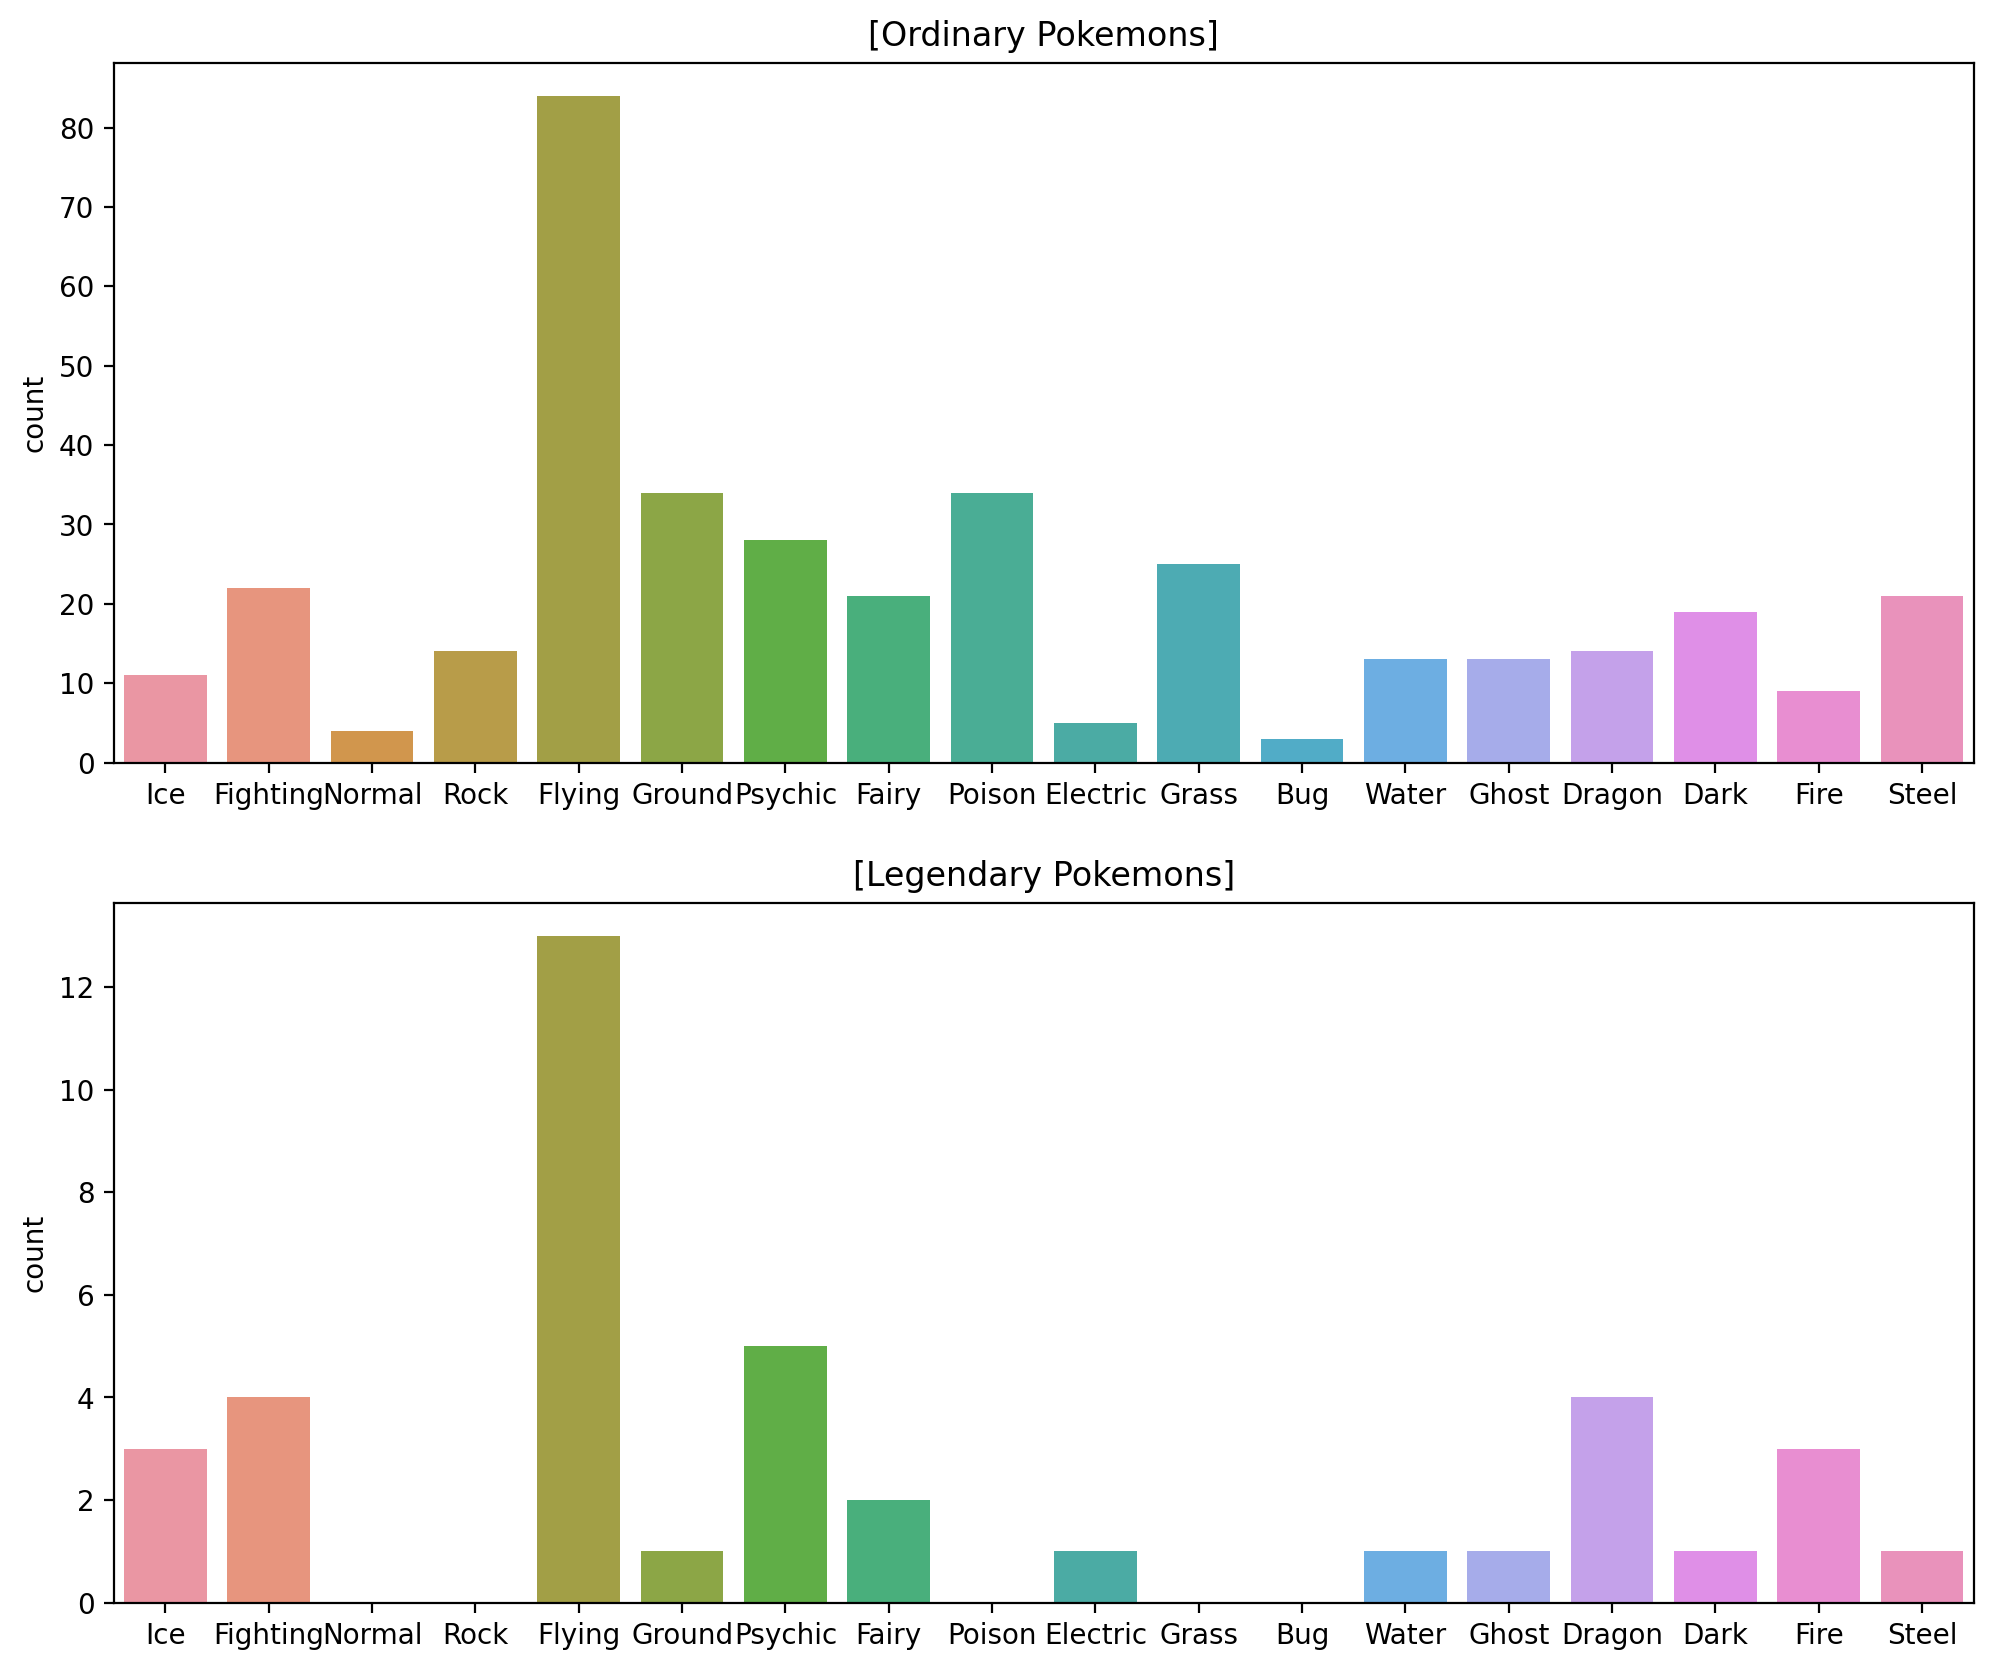

In [77]:
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [78]:
# Type2별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)
#Type 2에서는 Fire 속성 포켓몬의 Legendary 비율이 25%로 가장 높습니다.

Legendary
Type 2             
Fire       0.250000
Dragon     0.222222
Ice        0.214286
Electric   0.166667
Fighting   0.153846
Psychic    0.151515
Flying     0.134021
Fairy      0.086957
Water      0.071429
Ghost      0.071429
Dark       0.050000
Steel      0.045455
Ground     0.028571
Rock       0.000000
Bug        0.000000
Poison     0.000000
Normal     0.000000
Grass      0.000000

In [79]:
#데이터셋에서 포켓몬총 6가지의 스탯 값을 가집니다. 포켓몬 데이터의 Total 컬럼은 이 6가지 속성값의 총합입니다.
#모든 스탯의 종류를 stats라는 변수에 저장해 보겠습니다.
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

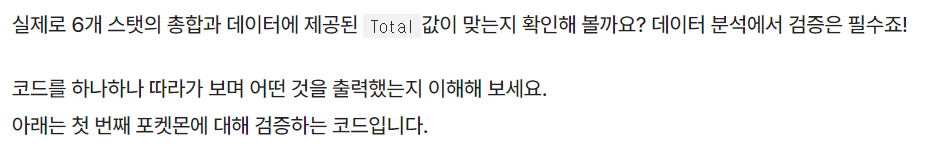

In [80]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])#0번째index의 포켓몬의 Name컬럼값을 가져온다
print("total: ", int(pokemon.loc[0, "Total"]))#0번째index의 포켓몬의 Total컬럼값을 가져온다
print("stats: ", list(pokemon.loc[0, stats]))#0번째index의 포켓몬의 모든스탯컬럼값을 리스트로가져온다
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))#0번째index의 포켓몬 모든스탯컬럼값을 더한다.,total값과비교

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


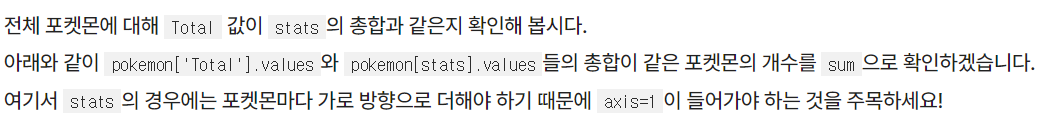

In [81]:
#'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수를 확인해봅시다
pokemon['Total_sum'] = pokemon['Total']
pokemon['Stats_sum'] = pokemon[stats].sum(axis=1)

matching_pokemon = (pokemon['Total_sum'] == pokemon['Stats_sum']).sum()
matching_pokemon
#total값과 stats(6개스탯)값이같은 값은 전체데이터수인 800으로 같다
#결론 total은 stats의합과 같다.검증완료

800

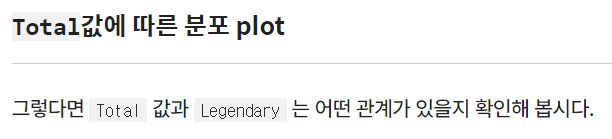

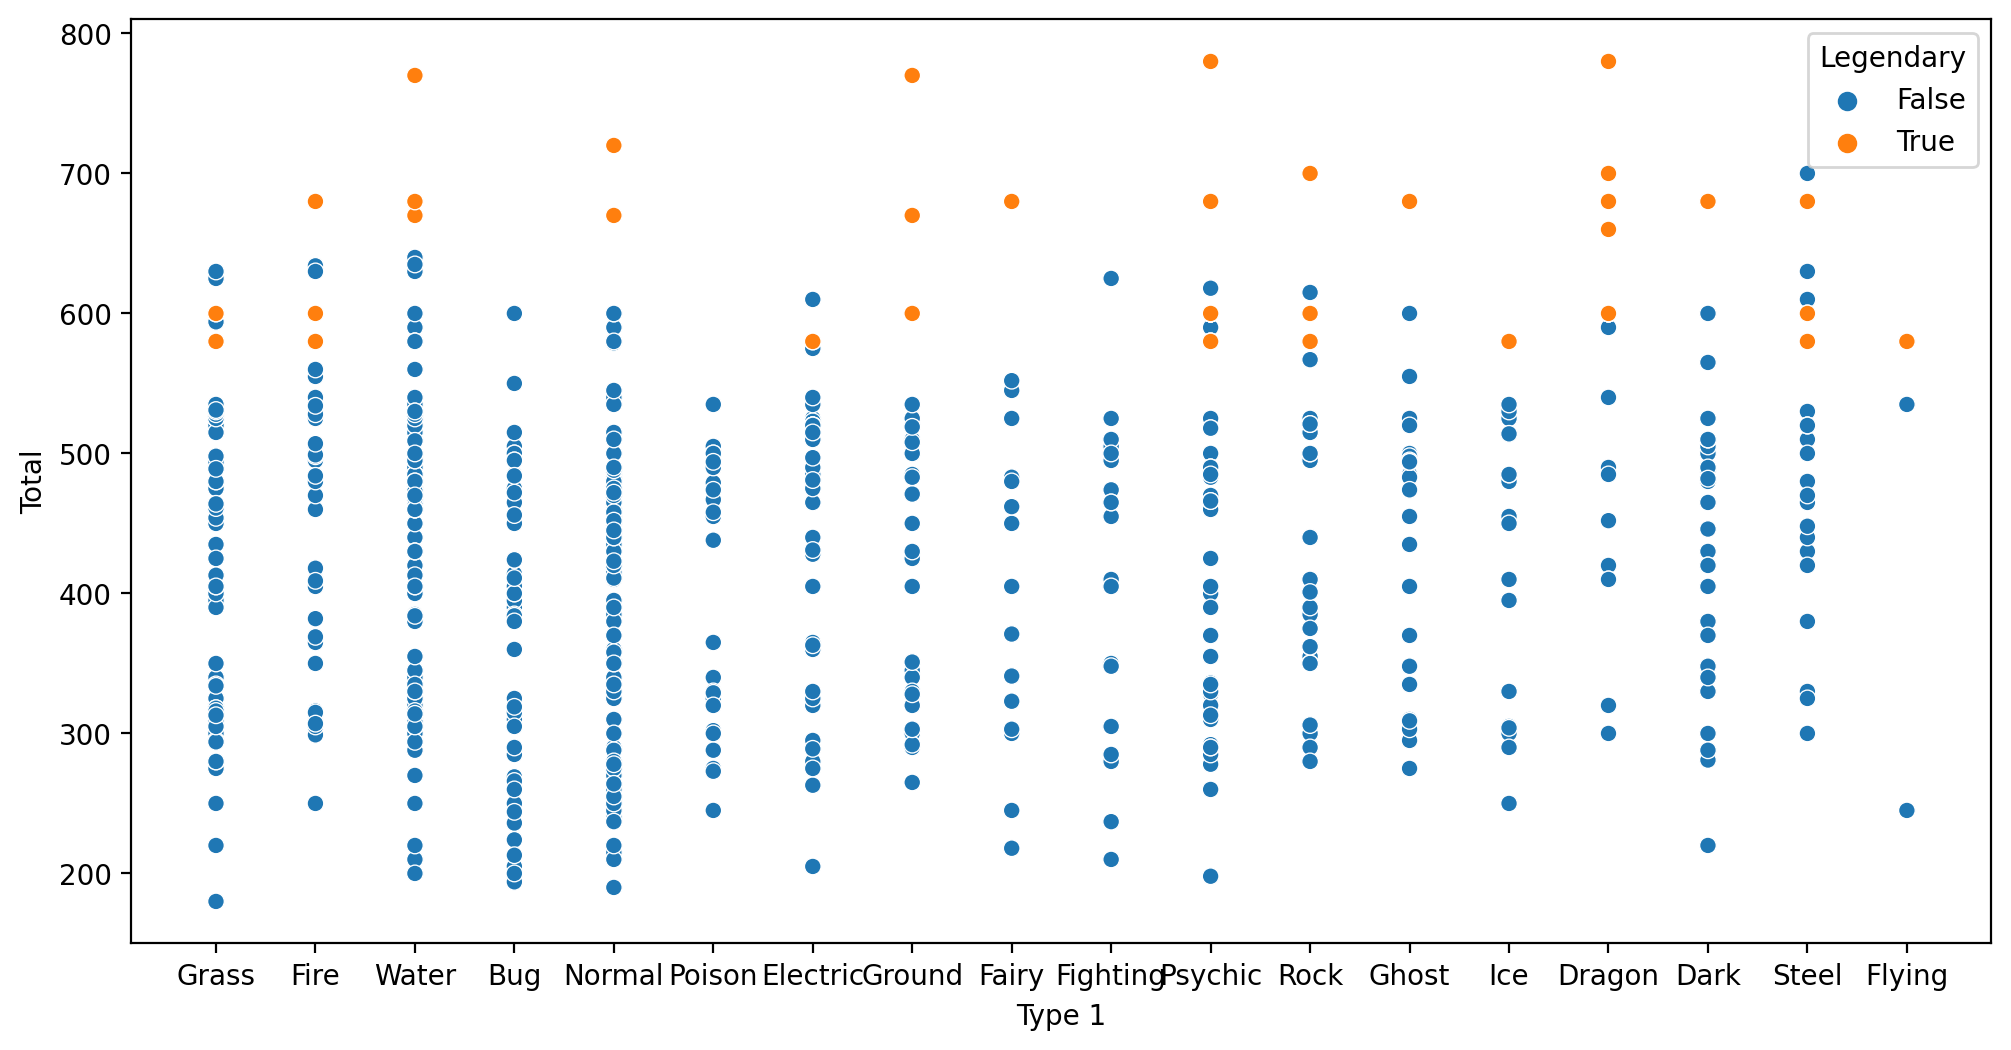

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()
# Legendary 여부에 따라 색깔(hue)을 달리하도록 했습니다. 점의 색깔을 보면 Type 1 별로 Total 값을 확인했을 때, 전설의 포켓몬은 주로 Total 스탯 값이 높다는 것이 확인됩니다.

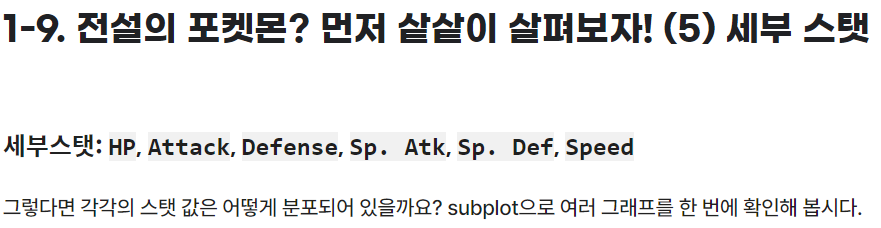

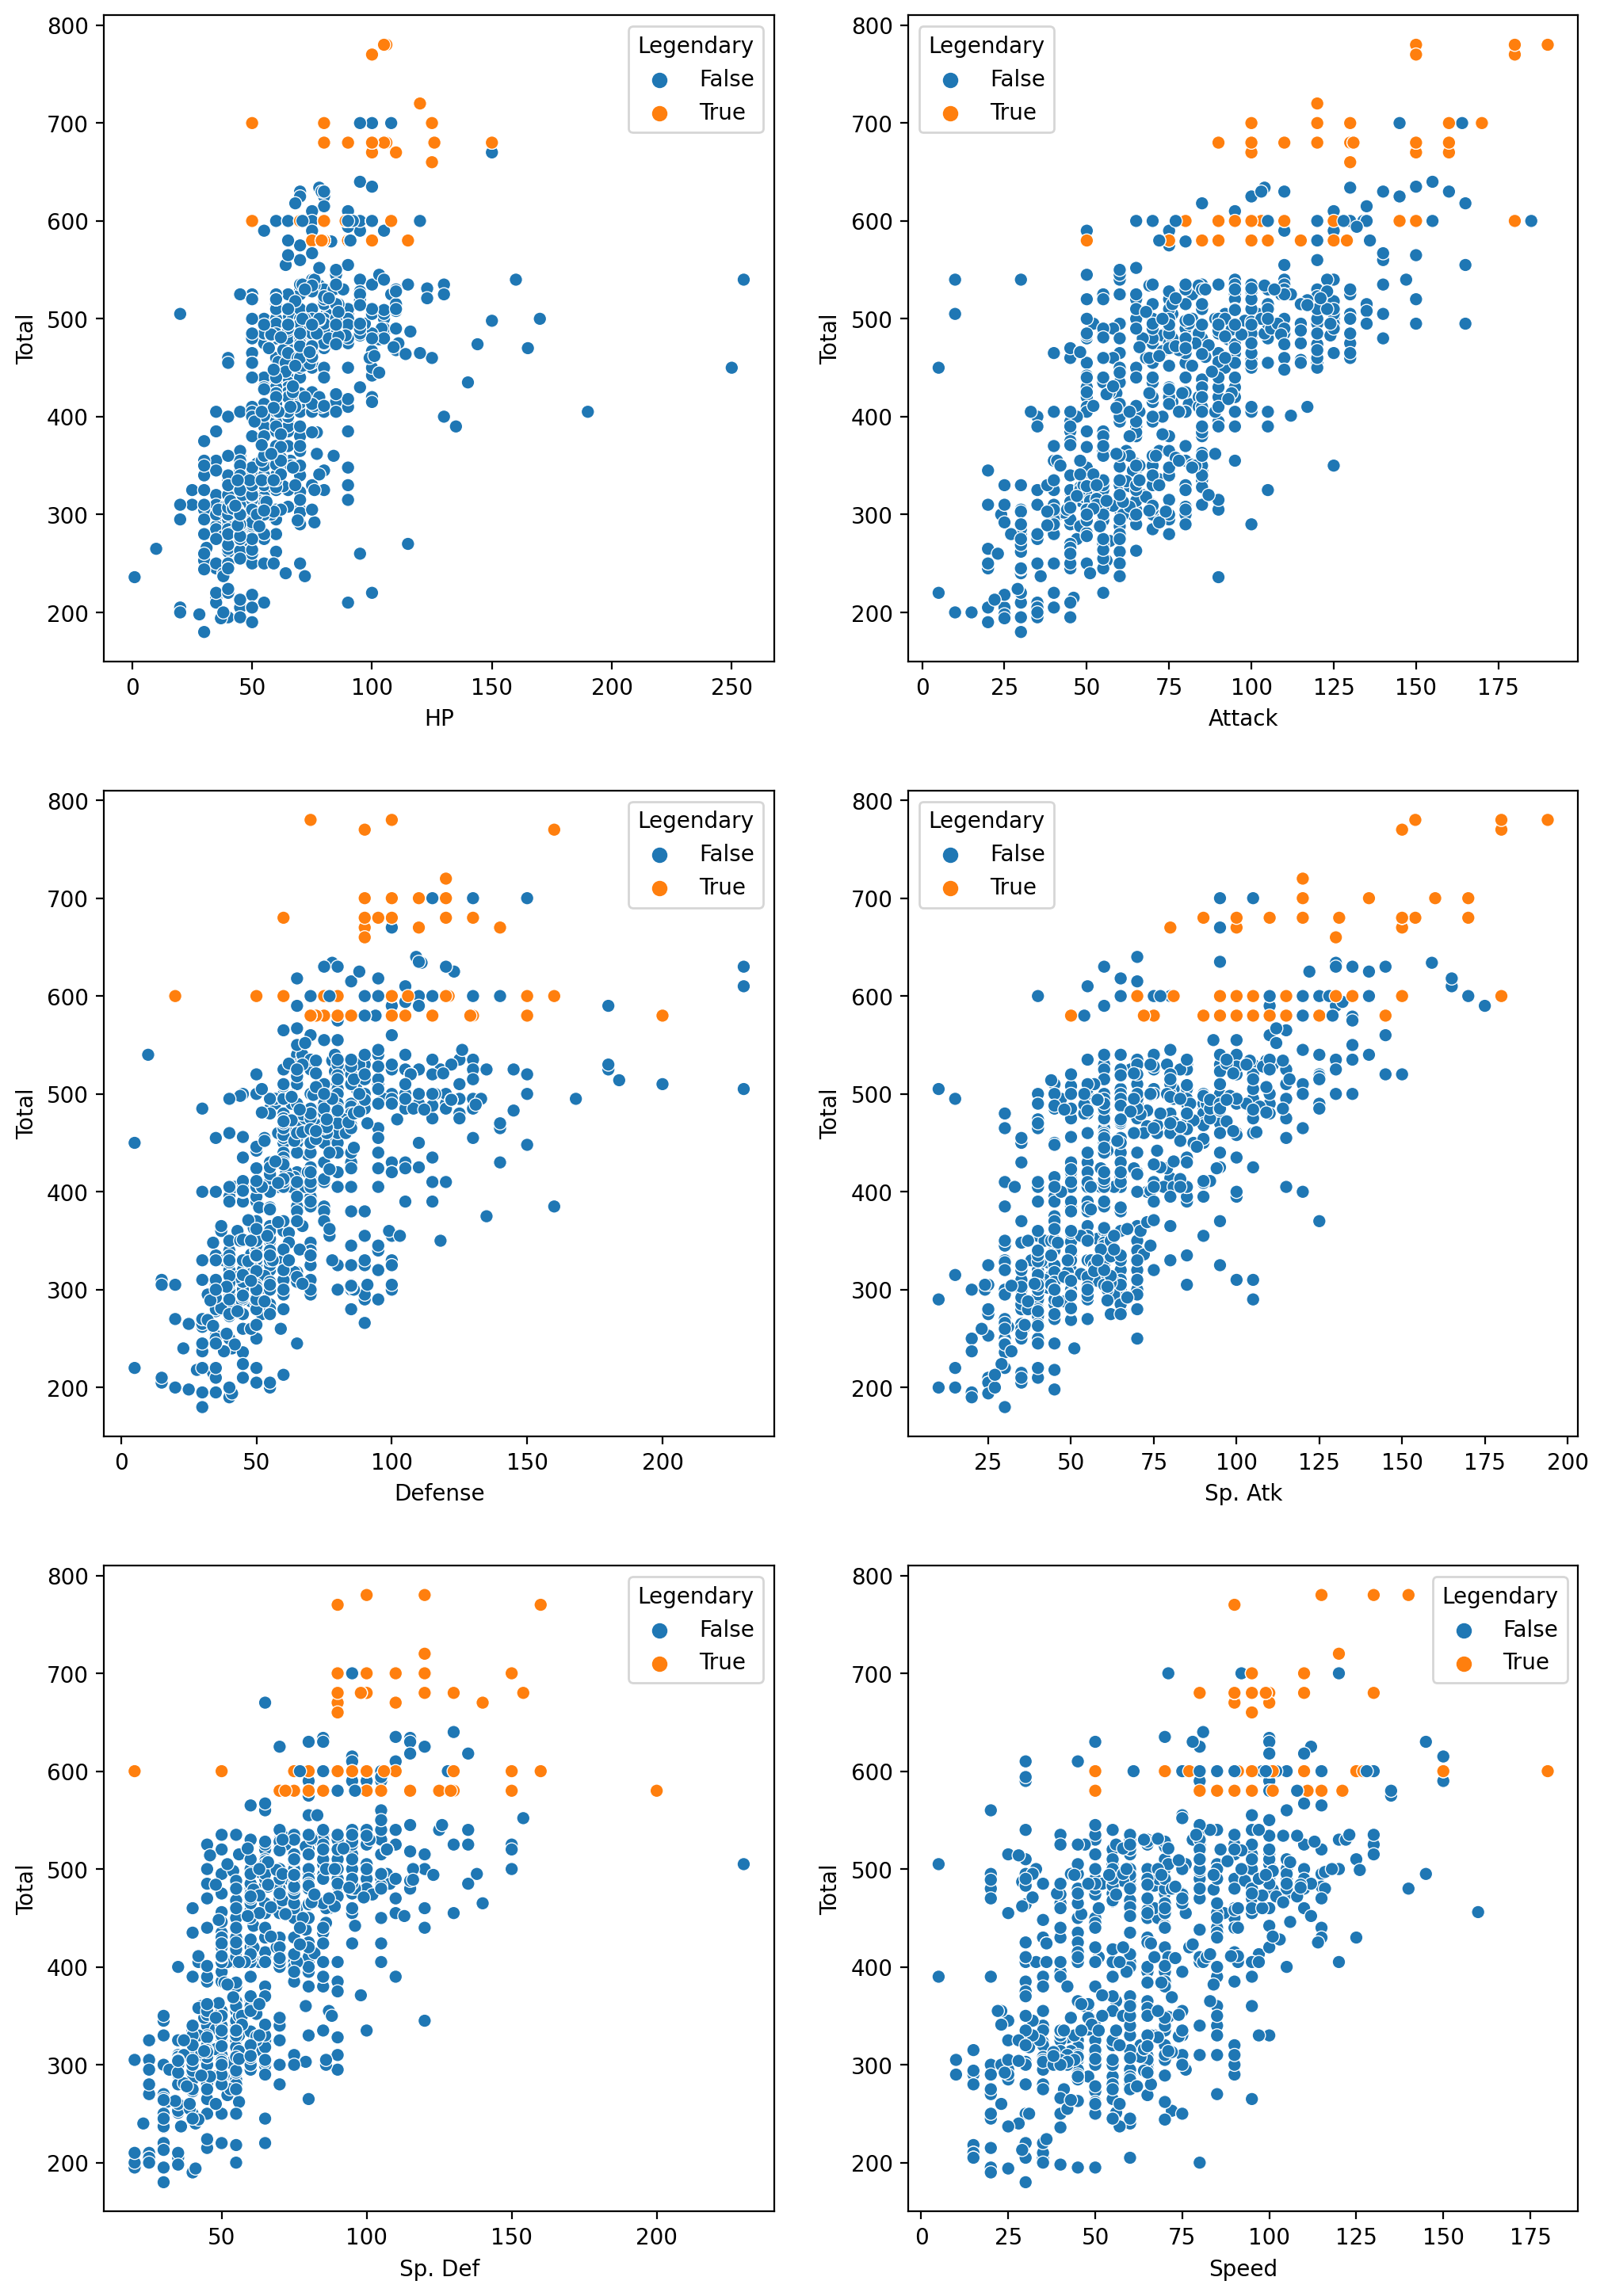

In [83]:
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

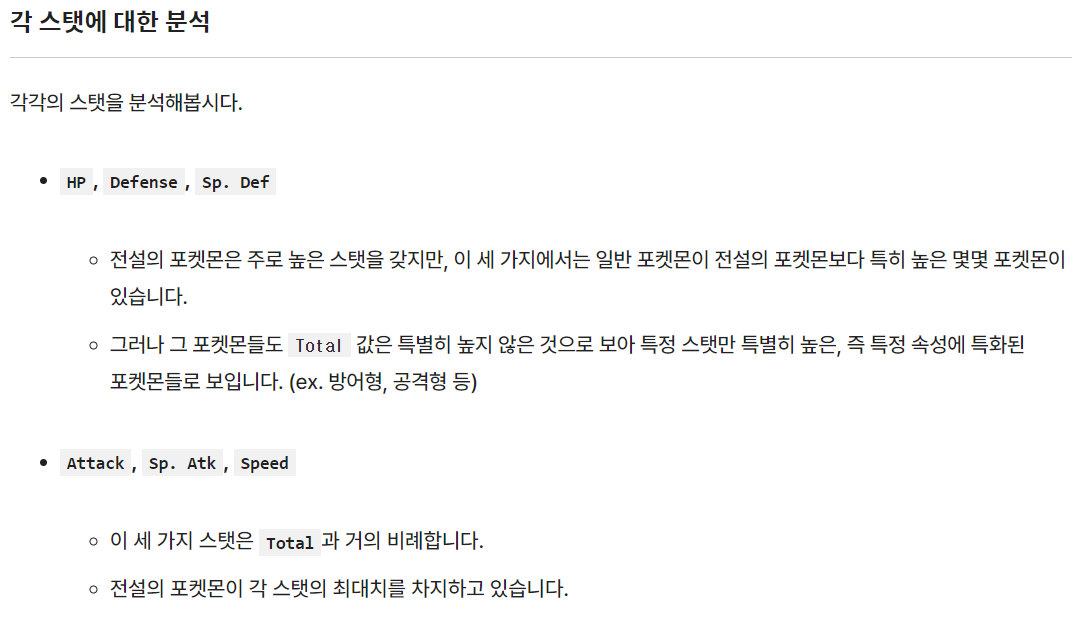

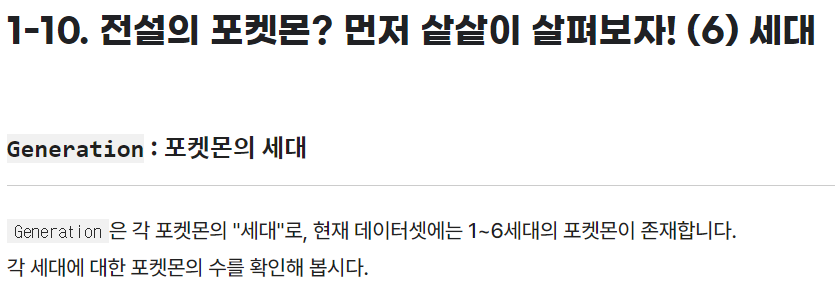

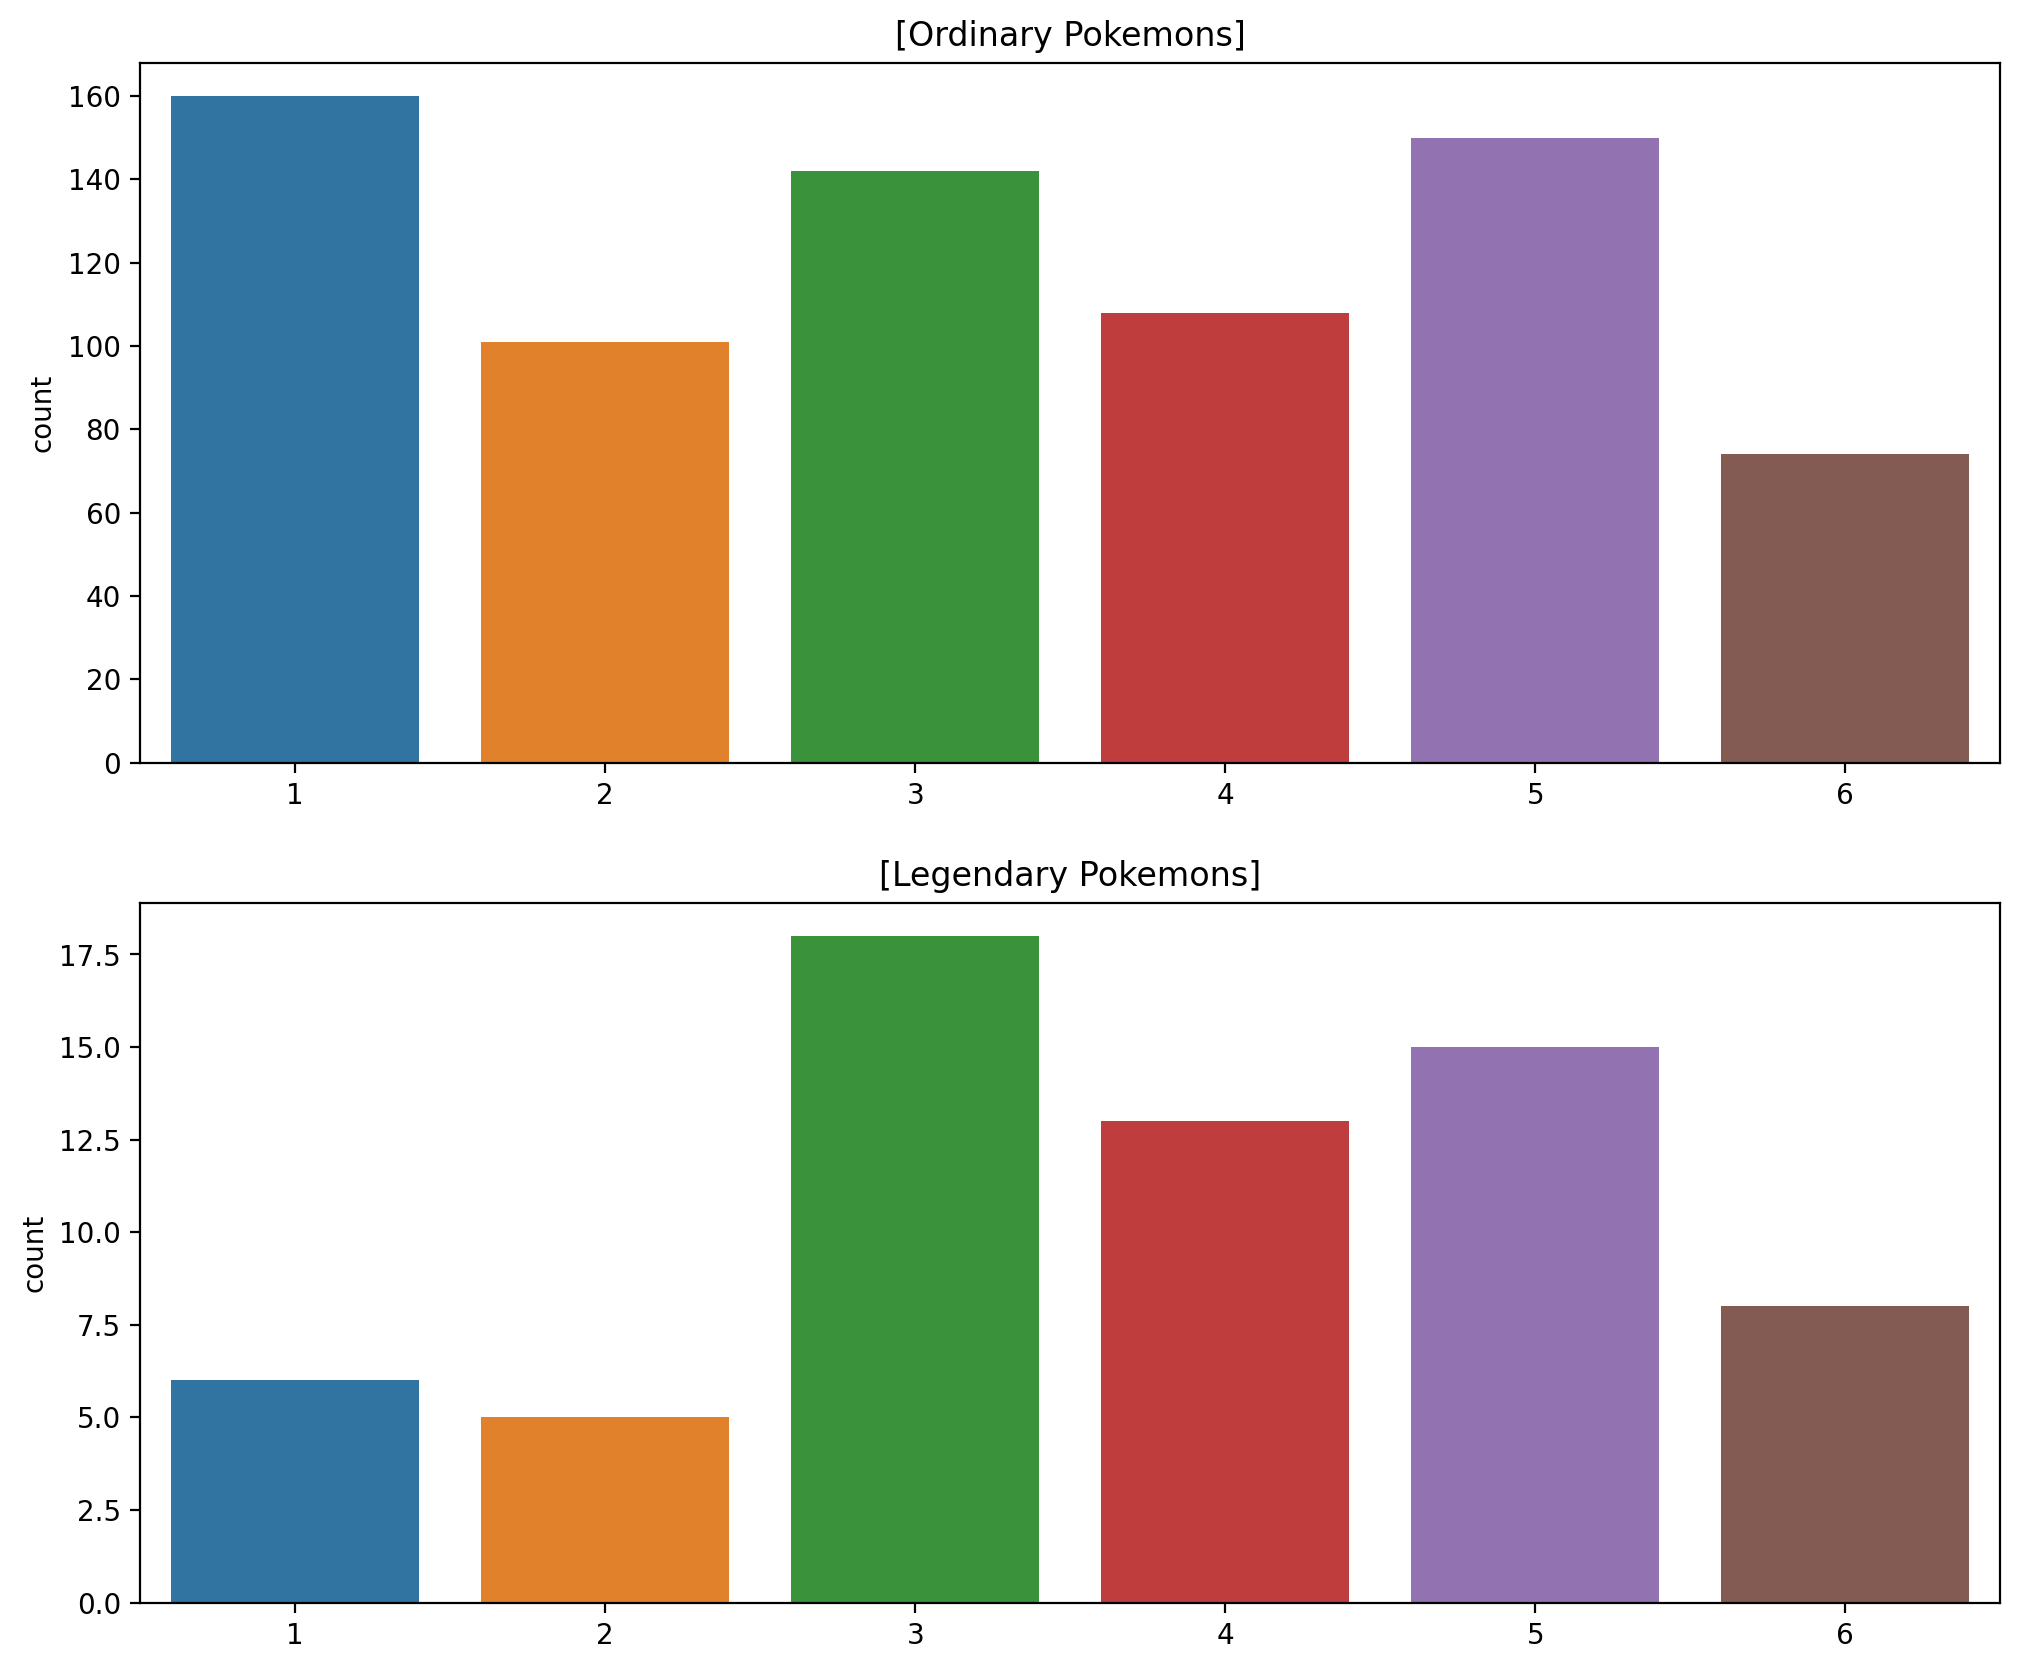

In [84]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

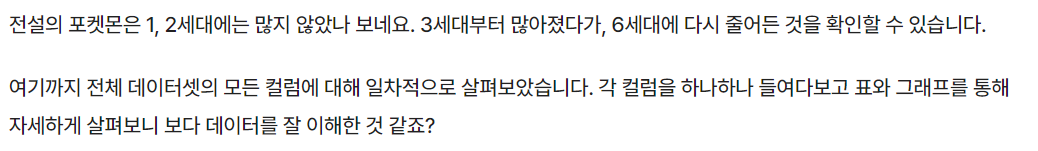

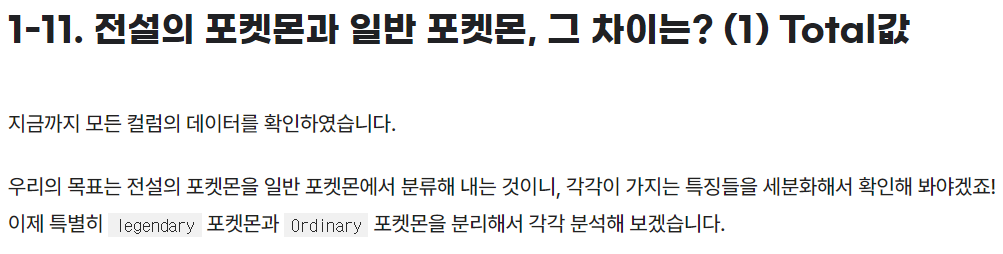

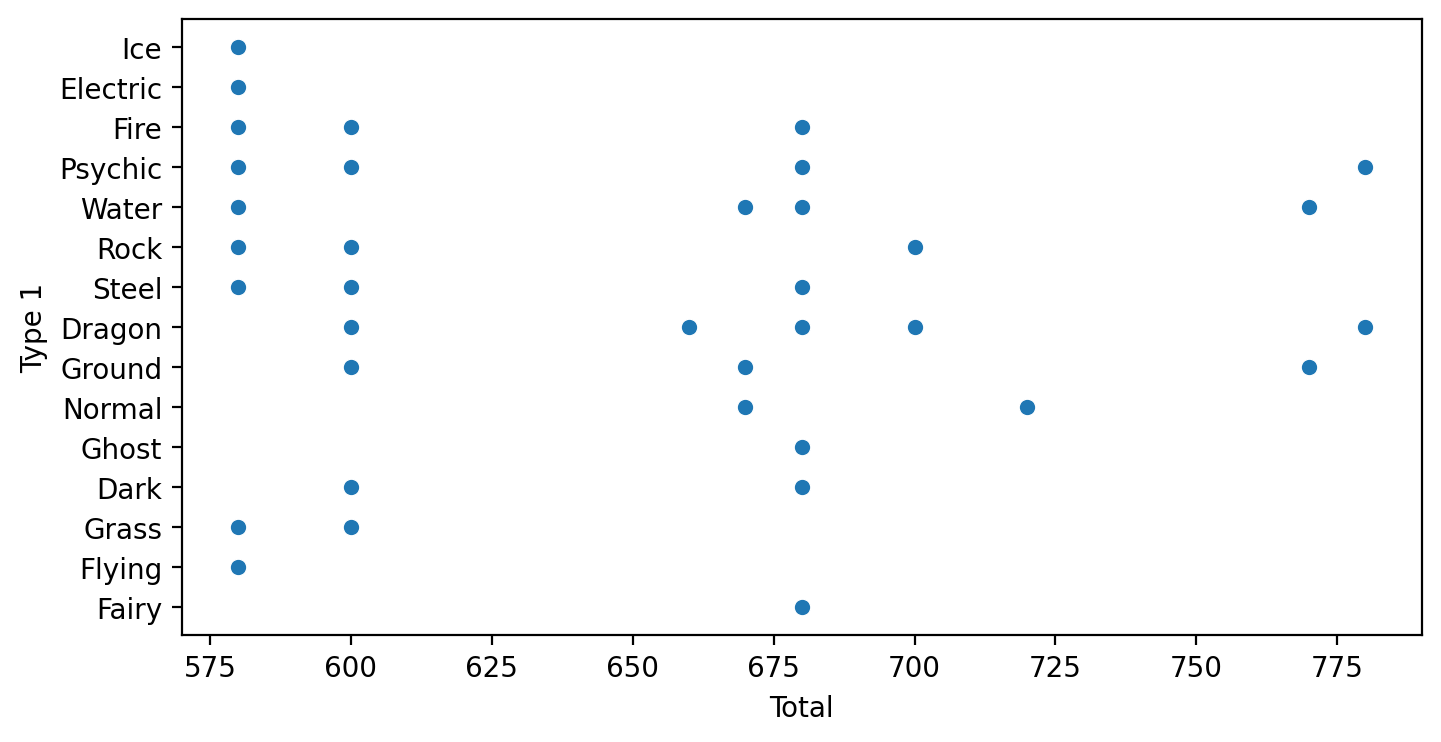

In [85]:
#전설의 포켓몬들의 Total값을 속성(type1)별로 확인해보기
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

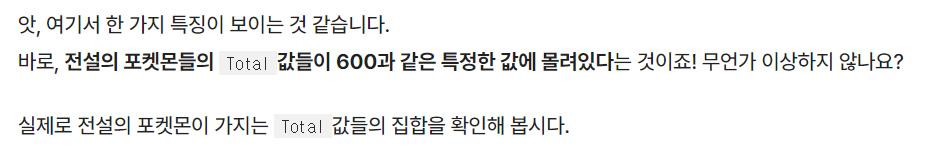

In [86]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


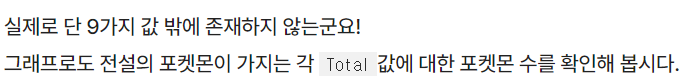

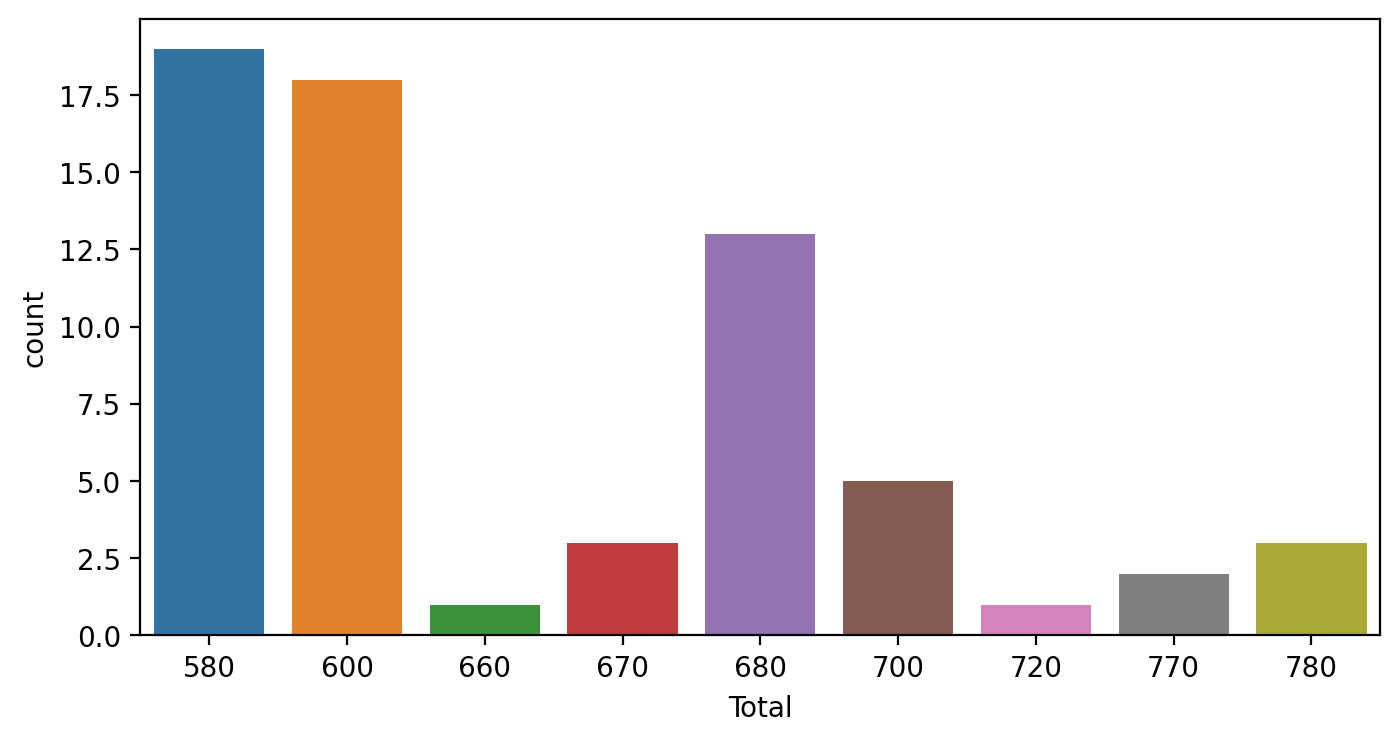

In [87]:
#그래프로 비율 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [88]:
# 총 65마리의 전설의 포켓몬이 9개의 Total값만 가진다
round(65 / 9, 2)#65를 9로 나눈 결과를 소수점 두 번째 자리까지 반올림하는 연산
#전설의 포켓몬은 약7.22마리씩 같은 total값을 가지는것을 알수있다.

7.22

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]
195


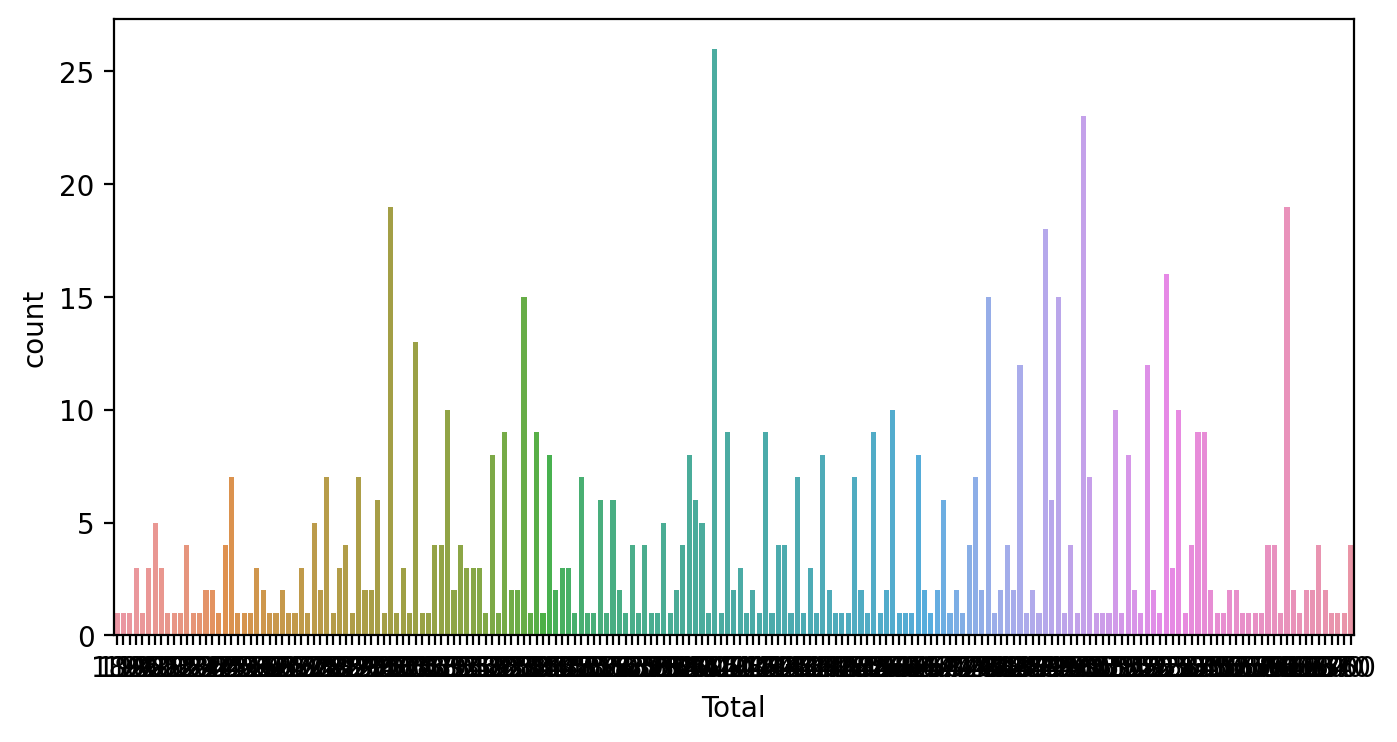

3.77

In [89]:
#일반포켓몬 total 값 집합 알아보기.
print(sorted(list(set(ordinary["Total"]))))
#집합의 크기(길이)확인
print(len(list(set(ordinary["Total"]))))
#그래프로 비율 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=ordinary, x="Total")
plt.show()
#총 735마리의 일반포켓몬이 195개의total값을 가진다
round(735 / 195, 2)
#일반포켓몬은 약3.77마리씩 같은 total값을 가지는것을 알수있다.

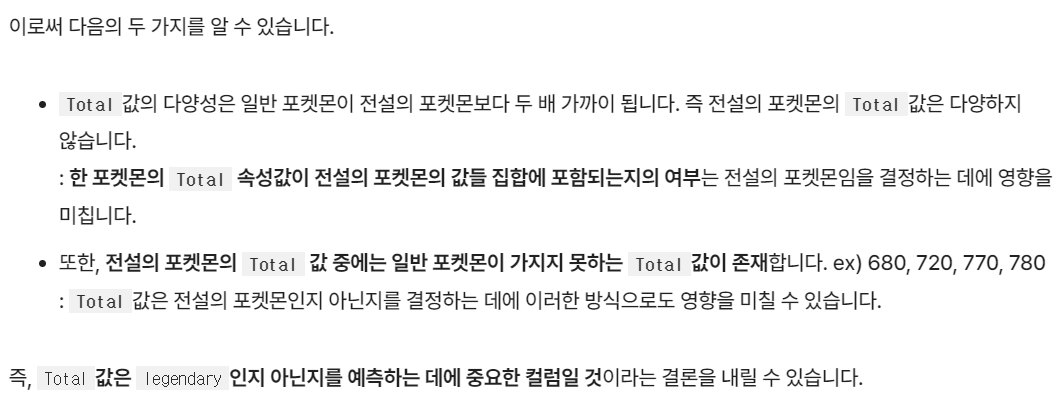

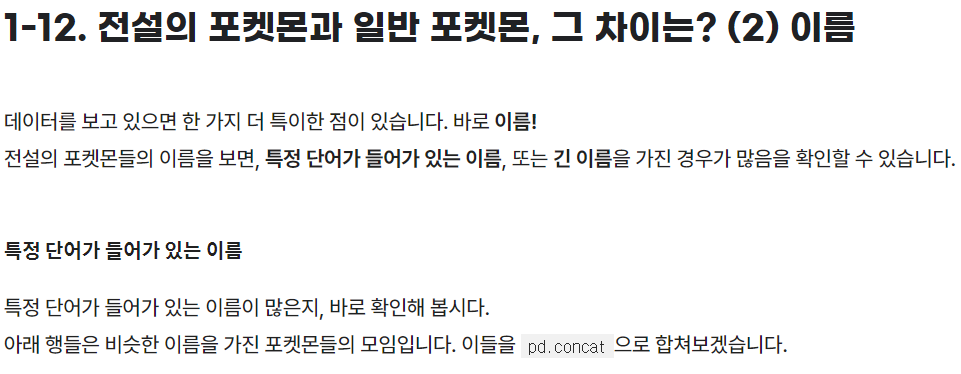

In [90]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)#기존에있던 index값을 버리고 다시 index
names

#                      Name    Type 1    Type 2  Total   HP  Attack  \
0   150                    Mewtwo   Psychic       NaN    680  106     110   
1   150       MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190   
2   150       MewtwoMega Mewtwo Y   Psychic       NaN    780  106     150   
3   380                    Latias    Dragon   Psychic    600   80      80   
4   380         LatiasMega Latias    Dragon   Psychic    700   80     100   
5   381                    Latios    Dragon   Psychic    600   80      90   
6   381         LatiosMega Latios    Dragon   Psychic    700   80     130   
7   382                    Kyogre     Water       NaN    670  100     100   
8   382       KyogrePrimal Kyogre     Water       NaN    770  100     150   
9   383                   Groudon    Ground       NaN    670  100     150   
10  383     GroudonPrimal Groudon    Ground      Fire    770  100     180   
11  384                  Rayquaza    Dragon    Flying    680  105     150   
12  384     RayquazaMega Rayquaza    Dragon    Flying    780  105     180   
13  386        DeoxysNormal Forme   Psychic       NaN    600   50     150   
14  386        DeoxysAttack Forme   Psychic       NaN    600   50     180   
15  386       DeoxysDefense Forme   Psychic       NaN    600   50      70   
16  386         DeoxysSpeed Forme   Psychic       NaN    600   50      95   
17  641   TornadusIncarnate Forme    Flying       NaN    580   79     115   
18  641     TornadusTherian Forme    Flying       NaN    580   79     100   
19  642  ThundurusIncarnate Forme  Electric    Flying    580   79     115   
20  642    ThundurusTherian Forme  Electric    Flying    580   79     105   
21  645   LandorusIncarnate Forme    Ground    Flying    600   89     125   
22  645     LandorusTherian Forme    Ground    Flying    600   89     145   
23  646                    Kyurem    Dragon       Ice    660  125     130   
24  646        KyuremBlack Kyurem    Dragon       Ice    700  125     170   
25  646        KyuremWhite Kyurem    Dragon       Ice    700  125     120   

    Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0        90      154       90    130           1       True  
1       100      154      100    130           1       True  
2        70      194      120    140           1       True  
3        90      110      130    110           3       True  
4       120      140      150    110           3       True  
5        80      130      110    110           3       True  
6       100      160      120    110           3       True  
7        90      150      140     90           3       True  
8        90      180      160     90           3       True  
9       140      100       90     90           3       True  
10      160      150       90     90           3       True  
11       90      150       90     95           3       True  
12      100      180      100    115           3       True  
13       50      150       50    150           3       True  
14       20      180       20    150           3       True  
15      160       70      160     90           3       True  
16       90       95       90    180           3       True  
17       70      125       80    111           5       True  
18       80      110       90    121           5       True  
19       70      125       80    111           5       True  
20       70      145       80    101           5       True  
21       90      115       80    101           5       True  
22       90      105       80     91           5       True  
23       90      130       90     95           5       True  
24      100      120       90     95           5       True  
25       90      170      100     95           5       True

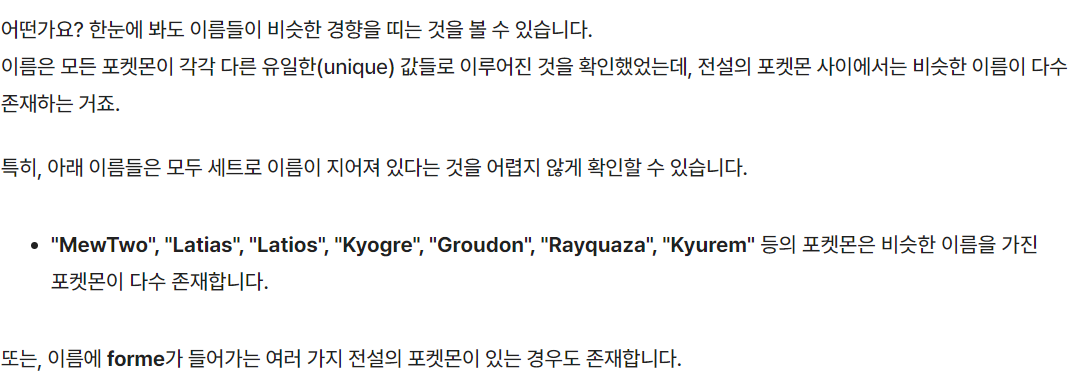

In [91]:
formes = names[13:23]
formes

#                      Name    Type 1  Type 2  Total  HP  Attack  \
13  386        DeoxysNormal Forme   Psychic     NaN    600  50     150   
14  386        DeoxysAttack Forme   Psychic     NaN    600  50     180   
15  386       DeoxysDefense Forme   Psychic     NaN    600  50      70   
16  386         DeoxysSpeed Forme   Psychic     NaN    600  50      95   
17  641   TornadusIncarnate Forme    Flying     NaN    580  79     115   
18  641     TornadusTherian Forme    Flying     NaN    580  79     100   
19  642  ThundurusIncarnate Forme  Electric  Flying    580  79     115   
20  642    ThundurusTherian Forme  Electric  Flying    580  79     105   
21  645   LandorusIncarnate Forme    Ground  Flying    600  89     125   
22  645     LandorusTherian Forme    Ground  Flying    600  89     145   

    Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
13       50      150       50    150           3       True  
14       20      180       20    150           3       True  
15      160       70      160     90           3       True  
16       90       95       90    180           3       True  
17       70      125       80    111           5       True  
18       80      110       90    121           5       True  
19       70      125       80    111           5       True  
20       70      145       80    101           5       True  
21       90      115       80    101           5       True  
22       90      105       80     91           5       True

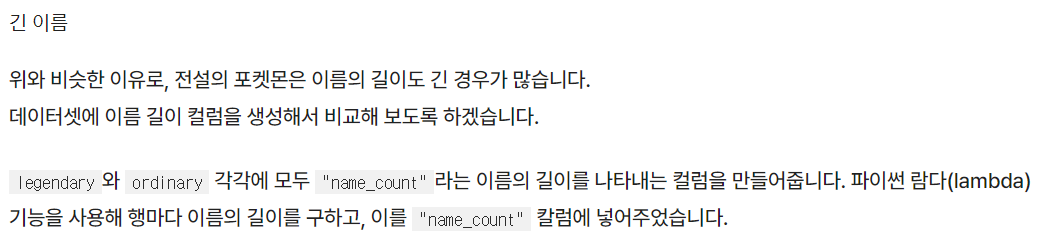

In [92]:
#legendary 포켓몬의 데이터에 'name_count' 값을 추가해줍시다.
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i)) 
#apply함수를 사용하여 전설의포켓몬데이터의name컬럼값을 lambda함수를 통해 i로받아서 이름의 길이를 알수있는 컬럼을 새로 만들었다.   
legendary.head()

#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  
0       95      125     85           1       True           8  
1      125       90    100           1       True           6  
2      125       85     90           1       True           7  
3      154       90    130           1       True           6  
4      154      100    130           1       True          19

In [93]:
# ordinary 포켓몬의 데이터에도 'name_count' 값을 추가해줍시다.
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

index  #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0      0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1      1  2                Ivysaur  Grass  Poison    405  60      62       63   
2      2  3               Venusaur  Grass  Poison    525  80      82       83   
3      3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4      4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  
0       65       65     45           1      False           9  
1       80       80     60           1      False           7  
2      100      100     80           1      False           8  
3      122      120     80           1      False          21  
4       60       50     65           1      False          10

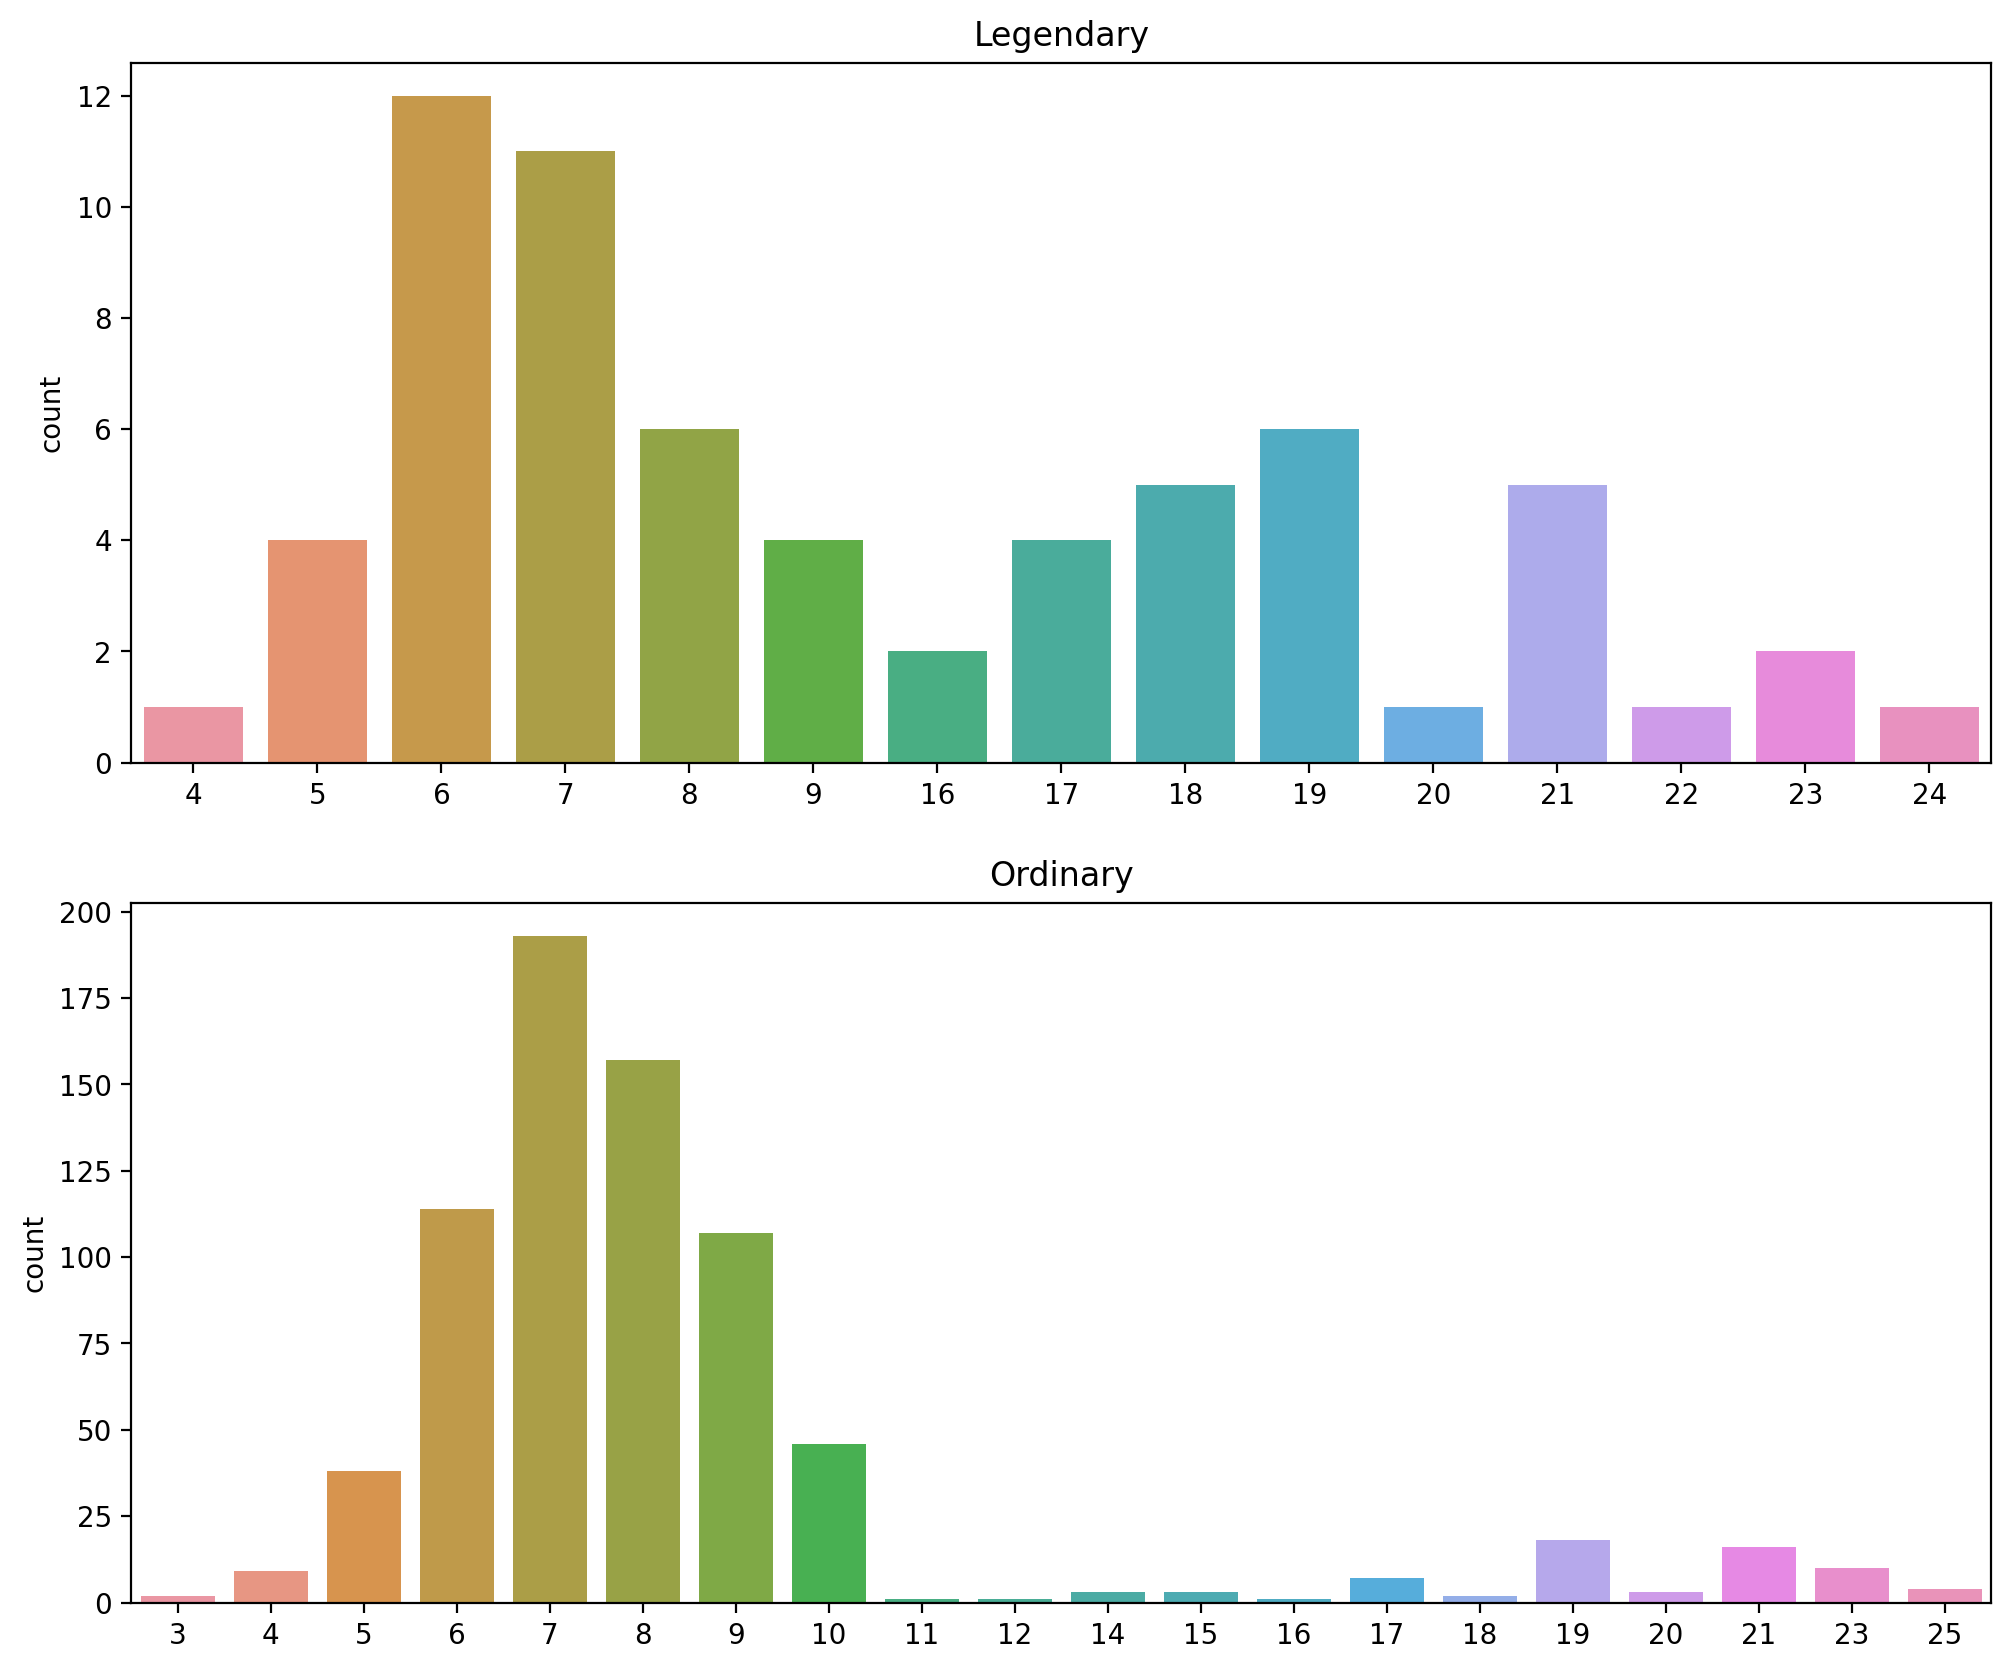

In [94]:
#name_count컬럼은 어떤특징을 가질까(그래프로확인)
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

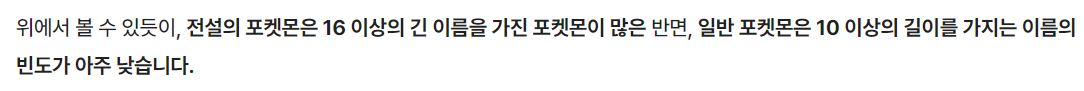

In [95]:
#전설의 포켓몬의 이름이 10글자이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")
#일반 포켓몬의 이름이 10글자이상일 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

41.54 %
15.65 %


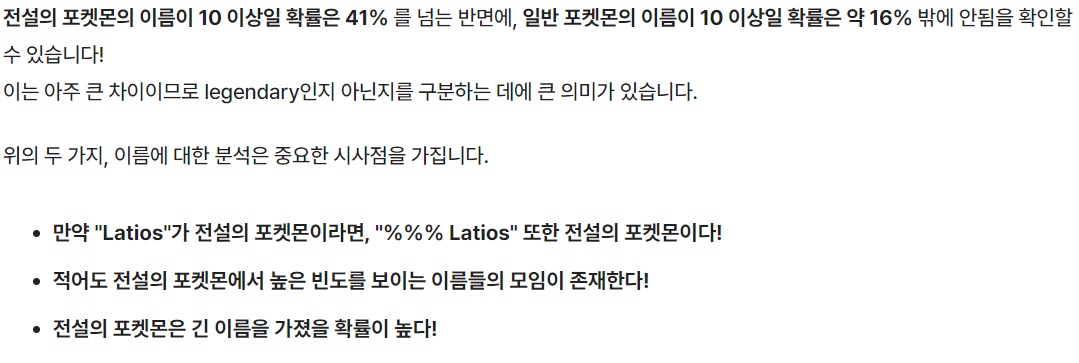

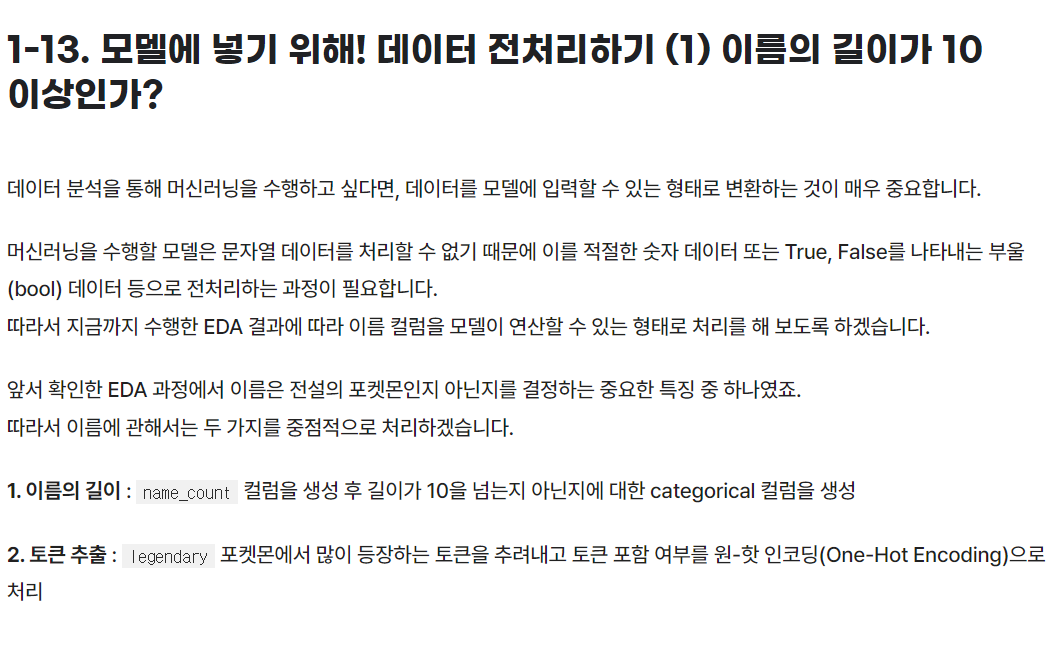

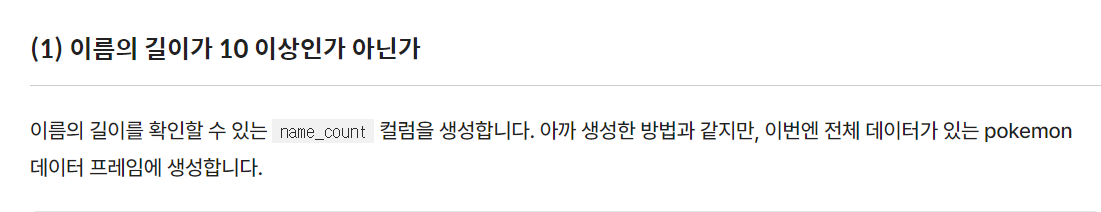

In [96]:
#이름의 길이가10이상인지 아닌지 알아보기
#이름의 길이를 알수있는 name_count컬럼 만들기
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total_sum  Stats_sum  \
0       65       65     45           1      False        318        318   
1       80       80     60           1      False        405        405   
2      100      100     80           1      False        525        525   
3      122      120     80           1      False        625        625   
4       60       50     65           1      False        309        309   

   name_count  
0           9  
1           7  
2           8  
3          21  
4          10

In [97]:
#이름의길이가 10이상이면true,10미만이면false를가지는 컬럼long_name만들기
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total_sum  Stats_sum  \
0       65       65     45           1      False        318        318   
1       80       80     60           1      False        405        405   
2      100      100     80           1      False        525        525   
3      122      120     80           1      False        625        625   
4       60       50     65           1      False        309        309   

   name_count  long_name  
0           9      False  
1           7      False  
2           8      False  
3          21       True  
4          10       True

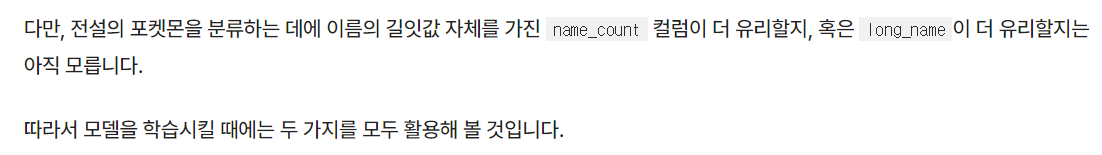

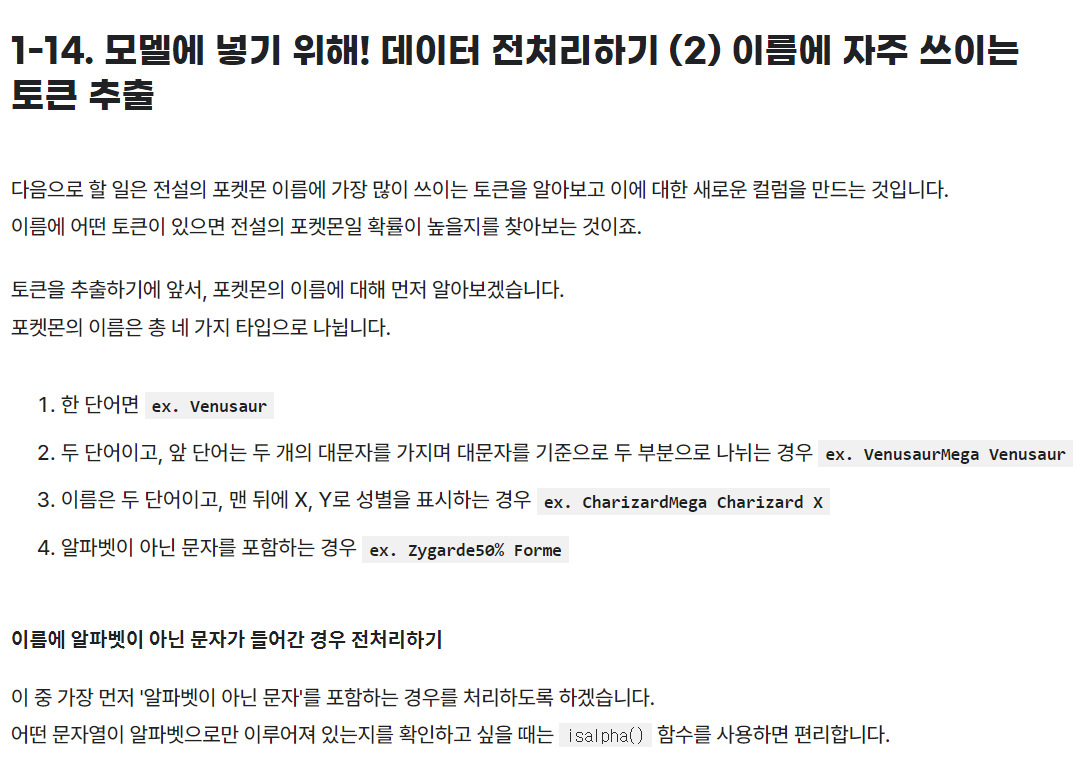

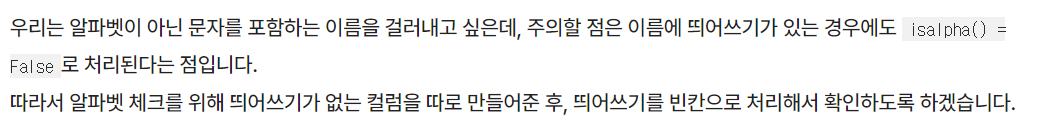

In [98]:
#이름에 띄어쓰기 없는 컬럼 만들기
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
#replace함수로 이름의 공백제거
pokemon.tail()#tail함수로 마지막 행 5개 출력


#                 Name   Type 1 Type 2  Total  HP  Attack  Defense  \
795  719              Diancie     Rock  Fairy    600  50     100      150   
796  719  DiancieMega Diancie     Rock  Fairy    700  50     160      110   
797  720  HoopaHoopa Confined  Psychic  Ghost    600  80     110       60   
798  720   HoopaHoopa Unbound  Psychic   Dark    680  80     160       60   
799  721            Volcanion     Fire  Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total_sum  Stats_sum  \
795      100      150     50           6       True        600        600   
796      160      110    110           6       True        700        700   
797      150      130     70           6       True        600        600   
798      170      130     80           6       True        680        680   
799      130       90     70           6       True        600        600   

     name_count  long_name        Name_nospace  
795           7      False             Diancie  
796          19       True  DiancieMegaDiancie  
797          19       True  HoopaHoopaConfined  
798          18       True   HoopaHoopaUnbound  
799           9      False           Volcanion

In [99]:
#이름에 띄어쓰기가 없어졌으니 isalpha()함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total_sum  Stats_sum  \
0       65       65     45           1      False        318        318   
1       80       80     60           1      False        405        405   
2      100      100     80           1      False        525        525   
3      122      120     80           1      False        625        625   
4       60       50     65           1      False        309        309   

   name_count  long_name          Name_nospace  name_isalpha  
0           9      False             Bulbasaur          True  
1           7      False               Ivysaur          True  
2           8      False              Venusaur          True  
3          21       True  VenusaurMegaVenusaur          True  
4          10       True            Charmander          True

In [100]:
#알파벳이 아닌 다른문자로 이름이 이루어진 포켓몬 찾아보기
print(pokemon[pokemon["name_isalpha"] == False].shape)#9마리의 포켓몬,19개의 컬럼을가진다.
pokemon[pokemon["name_isalpha"] == False]

(9, 19)


#              Name   Type 1  Type 2  Total   HP  Attack  Defense  \
34    29          Nidoran♀   Poison     NaN    275   55      47       52   
37    32          Nidoran♂   Poison     NaN    273   46      57       40   
90    83        Farfetch'd   Normal  Flying    352   52      65       55   
131  122          Mr. Mime  Psychic   Fairy    460   40      45       65   
252  233          Porygon2   Normal     NaN    515   85      80       90   
270  250             Ho-oh     Fire  Flying    680  106     130       90   
487  439          Mime Jr.  Psychic   Fairy    310   20      25       45   
525  474         Porygon-Z   Normal     NaN    535   85      80       70   
794  718  Zygarde50% Forme   Dragon  Ground    600  108     100      121   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total_sum  Stats_sum  \
34        40       40     41           1      False        275        275   
37        40       40     50           1      False        273        273   
90        58       62     60           1      False        352        352   
131      100      120     90           1      False        460        460   
252      105       95     60           2      False        515        515   
270      110      154     90           2       True        680        680   
487       70       90     60           4      False        310        310   
525      135       75     90           4      False        535        535   
794       81       95     95           6       True        600        600   

     name_count  long_name     Name_nospace  name_isalpha  
34            8      False         Nidoran♀         False  
37            8      False         Nidoran♂         False  
90           10       True       Farfetch'd         False  
131           8      False          Mr.Mime         False  
252           8      False         Porygon2         False  
270           5      False            Ho-oh         False  
487           8      False          MimeJr.         False  
525           9      False        Porygon-Z         False  
794          16       True  Zygarde50%Forme         False

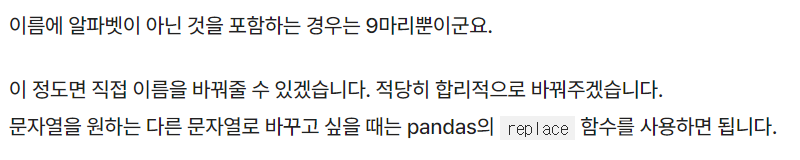

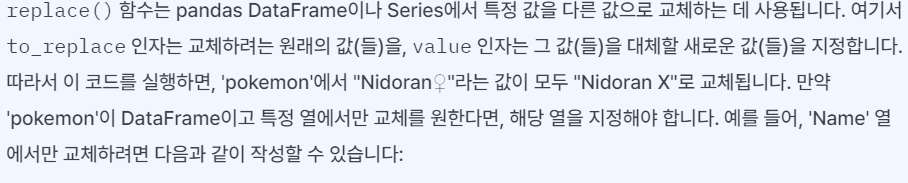

In [101]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

#           Name   Type 1  Type 2  Total   HP  Attack  Defense  \
34    29      Nidoran X   Poison     NaN    275   55      47       52   
37    32      Nidoran Y   Poison     NaN    273   46      57       40   
90    83      Farfetchd   Normal  Flying    352   52      65       55   
131  122        Mr Mime  Psychic   Fairy    460   40      45       65   
252  233    Porygon Two   Normal     NaN    515   85      80       90   
270  250          Ho Oh     Fire  Flying    680  106     130       90   
487  439        Mime Jr  Psychic   Fairy    310   20      25       45   
525  474      Porygon Z   Normal     NaN    535   85      80       70   
794  718  Zygarde Forme   Dragon  Ground    600  108     100      121   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total_sum  Stats_sum  \
34        40       40     41           1      False        275        275   
37        40       40     50           1      False        273        273   
90        58       62     60           1      False        352        352   
131      100      120     90           1      False        460        460   
252      105       95     60           2      False        515        515   
270      110      154     90           2       True        680        680   
487       70       90     60           4      False        310        310   
525      135       75     90           4      False        535        535   
794       81       95     95           6       True        600        600   

     name_count  long_name     Name_nospace  name_isalpha  
34            8      False        Nidoran X         False  
37            8      False        Nidoran Y         False  
90           10       True        Farfetchd         False  
131           8      False          Mr.Mime         False  
252           8      False      Porygon Two         False  
270           5      False            Ho Oh         False  
487           8      False          MimeJr.         False  
525           9      False        Porygon Z         False  
794          16       True  Zygarde50%Forme         False

In [103]:
#바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]
print(pokemon[pokemon["name_isalpha"] == False].shape)
#모든이름이 영어로 바뀐것을 알수있다.

(0, 19)


### 전설의 포켓몬 이름에 가장 많이 쓰이는 토큰을 알아보고 이에 대한 새로운 컬럼을 만드는 것입니다.이름에 어떤 토큰이 있으면 전설의 포켓몬일 확률이 높을지를 찾아보기
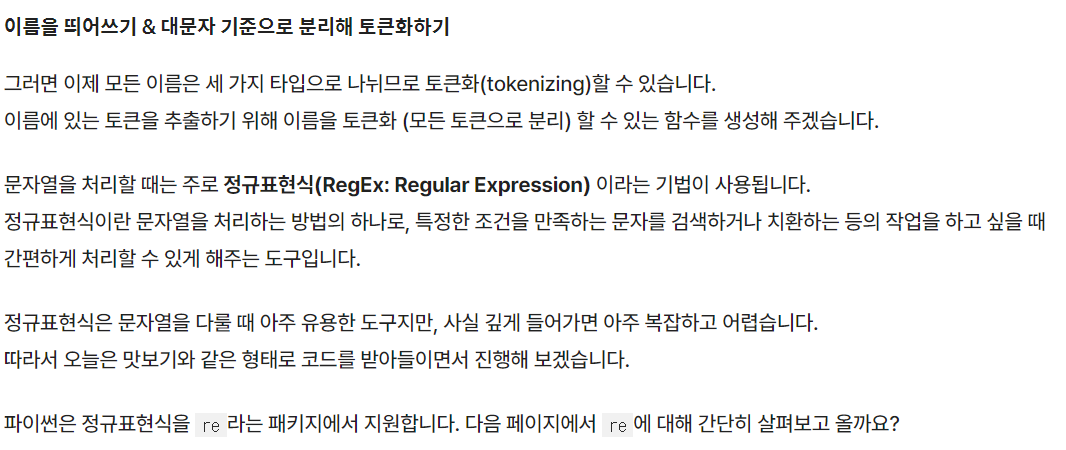

In [104]:
#정규식 패키지 불러오기
import re

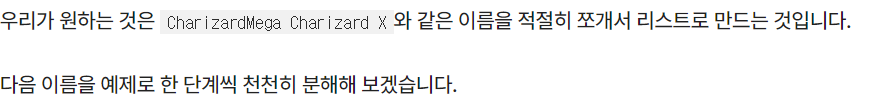

In [108]:
#정규표현식을 사용해 이름을 하나씩 토큰화시켜보기
name = "CharizardMega Charizard X"
name_split = name.split(" ")
name_split
#공백으로 나눠준 뒤에 대문자를 기준으로 나누기(토큰화)
temp = name_split[0]#CharizardMega를 나눠보기
temp


'CharizardMega'

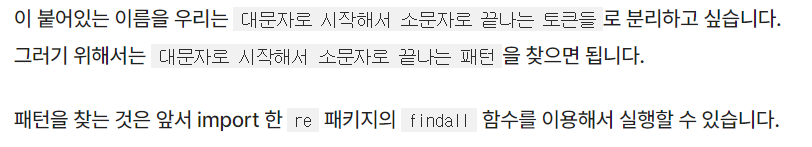

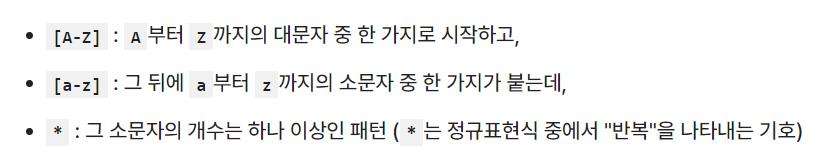

In [109]:
tokens = re.findall('[A-Z][a-z]*', temp)
tokens#대문자기준으로 잘 토큰화가 되어있는것을 알수있다.

['Charizard', 'Mega']

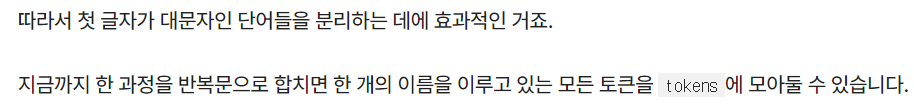

In [110]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

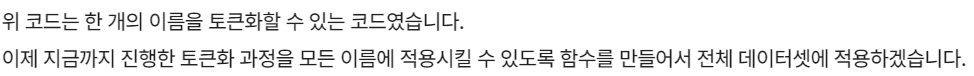

In [111]:
#토큰화 할수있는 함수를 만들어줍니다.
def tokenize(name):
    name_split = name.split(" ")
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
        
    return np.array(tokens)

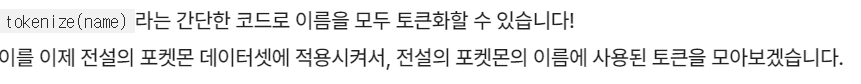

In [112]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)
#중복을 제외한 총 65개의 토큰이 있는것을 확인할수있다.(set함수로 집합을 만들었기때문에 중복제거)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

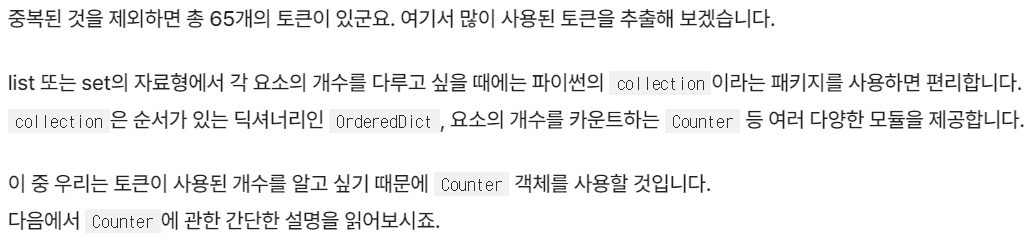
### collection패키지의counter()모듈은 데이터에서 각 요소의 빈도수를 쉽게 알수있다.

In [114]:
#모듈불러오기
from collections import Counter
#Counter 객체는  각 요소가 몇 개인지를 담은 튜플 리스트를 반환합니다.
#most_common을 활용하면 가장 많은 요소와 등장 횟수가 무엇인지를 정렬해준다.

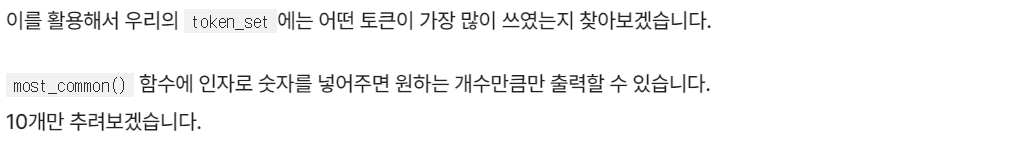

In [115]:
#most_common()함수를 통해 전설의 포켓몬이름중 어떤토큰이 얼마나쓰였는지 높은순서대로 정렬
most_common = Counter(token_set).most_common(10)
most_common
#설의 포켓몬 이름에는 Forme가 15번이나 쓰였고, 진화를 했을 때 붙는 이름인 Mega도 6번 쓰였다.
#전체 65마리밖에 되지 않는 전설의 포켓몬에서 저 정도의 횟수라면 꽤나 많이 쓰였다고 볼 수 있겠습니다.

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

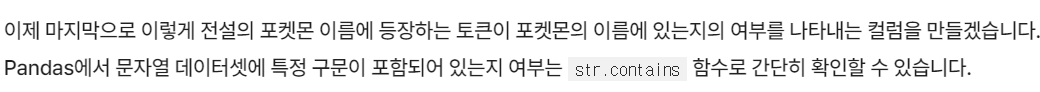

In [116]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)
#for token, _ in most_common: 구문은 most_common 리스트의 각 요소에서 토큰만을 가져와 처리하고, 빈도수는 무시하겠다는 것을 의미합니다. 이렇게 _는 반복문에서 사용되지 않는 값을 임시로 저장하는 데 사용됩니다.
# 파이썬에서 _ (underscore)는 일반적으로 임시 변수로 사용되며, 이 변수의 값은 코드에서 실제로 사용되지 않습니다. 이는 특히 for 루프에서 특정 값을 무시하고 싶을 때, 또는 변수가 필요하지만 그 값을 실제로 사용하지 않을 때 유용합니다.
# 예를 들어, most_common이 (토큰, 빈도수) 형태의 튜플을 요소로 가진 리스트라면, 이 부분은 각 토큰에 대해 반복을 수행하되 빈도수는 무시하겠다는 의미입니다.

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1                  Bulbasaur  Grass  Poison    318  45      49       49   
1  2                    Ivysaur  Grass  Poison    405  60      62       63   
2  3                   Venusaur  Grass  Poison    525  80      82       83   
3  3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4                 Charmander   Fire     NaN    309  39      52       43   
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9  7                   Squirtle  Water     NaN    314  44      48       65   

   Sp. Atk  Sp. Def  ...  Forme   Mega  Mewtwo  Kyurem  Deoxys  Hoopa  Latias  \
0       65       65  ...  False  False   False   False   False  False   False   
1       80       80  ...  False  False   False   False   False  False   False   
2      100      100  ...  False  False   False   False   False  False   False   
3      122      120  ...  False   True   False   False   False  False   False   
4       60       50  ...  False  False   False   False   False  False   False   
5       80       65  ...  False  False   False   False   False  False   False   
6      109       85  ...  False  False   False   False   False  False   False   
7      130       85  ...  False   True   False   False   False  False   False   
8      159      115  ...  False   True   False   False   False  False   False   
9       50       64  ...  False  False   False   False   False  False   False   

  Latios  Kyogre  Groudon  
0  False   False    False  
1  False   False    False  
2  False   False    False  
3  False   False    False  
4  False   False    False  
5  False   False    False  
6  False   False    False  
7  False   False    False  
8  False   False    False  
9  False   False    False  

[10 rows x 29 columns]

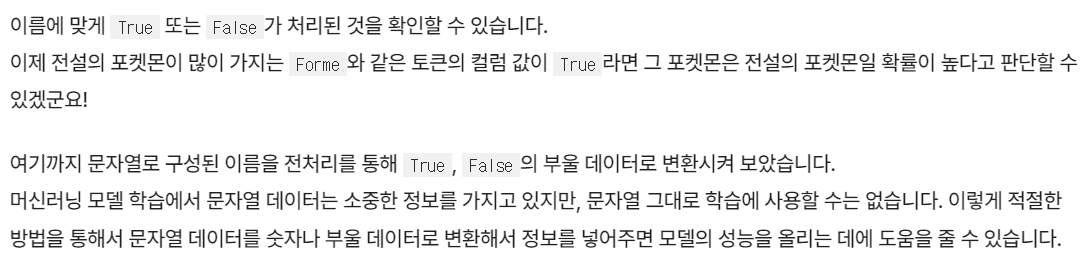

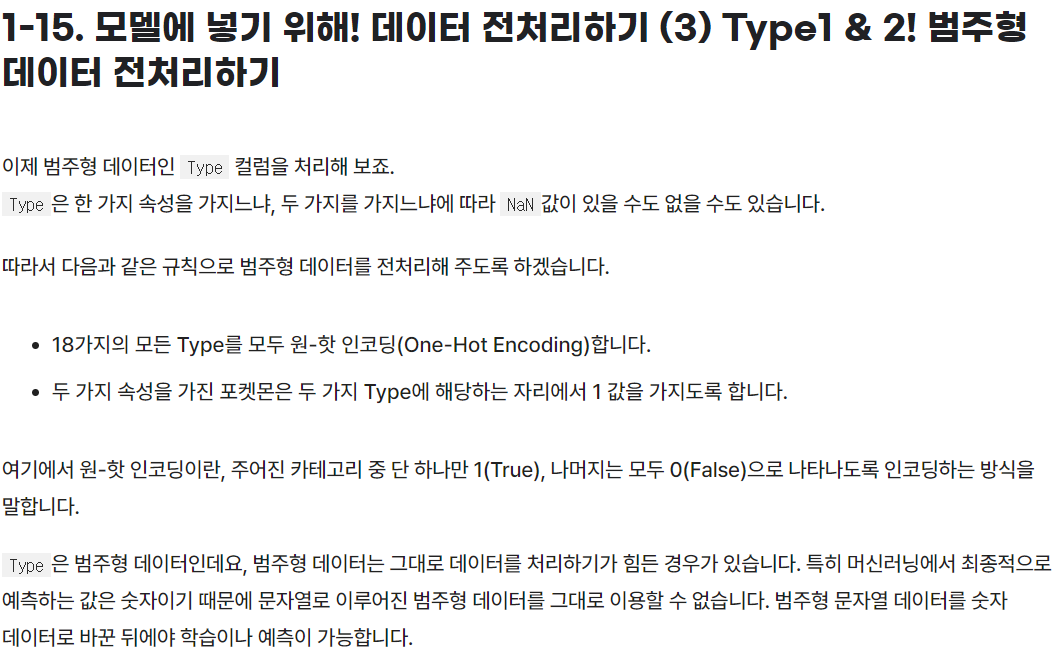

#### 범주형데이터 수치형데이터로 바꾸는 인코딩에대한설명
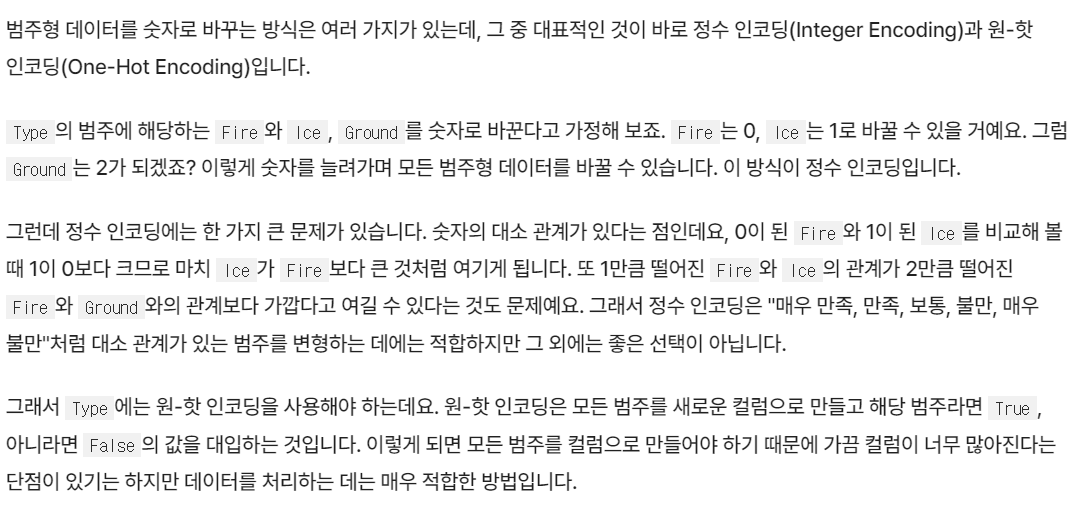

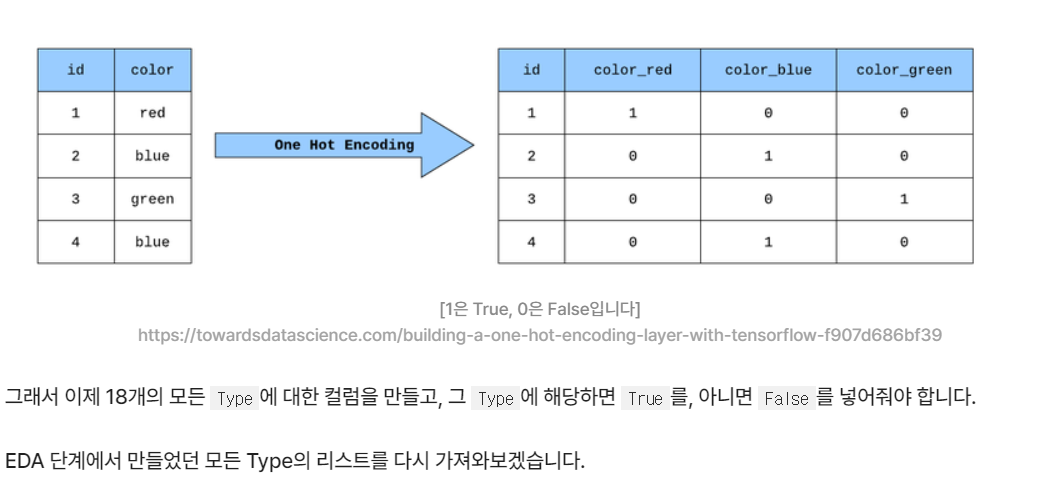

In [118]:
#이제 18개의 모든 Type에 대한 컬럼을 만들고, 그 Type에 해당하면 True를, 아니면 False를 넣어줘야 합니다.
# EDA 단계에서 만들었던 모든 Type의 리스트를 다시 가져와보겠습니다.
print(types)
#18개의 컬럼을 원-핫인코딩
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
#types(포켓못타입유형별 리스트)가 for분을 돌며 새로운 컬럼pokemon[t]을 만듭니다
#타입1과타입2중 하나라고 t와 같으면 true를 반환하는 논리연산자입니다.여기서t는포켓몬의 type:18개입니다.
pokemon[[["Type 1", "Type 2"] + types][0]].head()

['Ice', 'Fighting', 'Normal', 'Rock', 'Flying', 'Ground', 'Psychic', 'Fairy', 'Poison', 'Electric', 'Grass', 'Bug', 'Water', 'Ghost', 'Dragon', 'Dark', 'Fire', 'Steel']


Type 1  Type 2    Ice  Fighting  Normal   Rock  Flying  Ground  Psychic  \
0  Grass  Poison  False     False   False  False   False   False    False   
1  Grass  Poison  False     False   False  False   False   False    False   
2  Grass  Poison  False     False   False  False   False   False    False   
3  Grass  Poison  False     False   False  False   False   False    False   
4   Fire     NaN  False     False   False  False   False   False    False   

   Fairy  Poison  Electric  Grass    Bug  Water  Ghost  Dragon   Dark   Fire  \
0  False    True     False   True  False  False  False   False  False  False   
1  False    True     False   True  False  False  False   False  False  False   
2  False    True     False   True  False  False  False   False  False  False   
3  False    True     False   True  False  False  False   False  False  False   
4  False   False     False  False  False  False  False   False  False   True   

   Steel  
0  False  
1  False  
2  False  
3  False  
4  False

#### 원핫인코딩이 잘 된것을 알수있다.
#### true = 1,false = 0
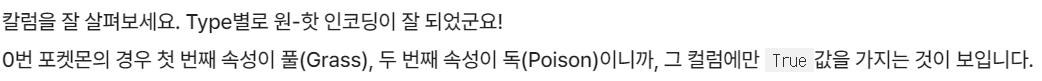

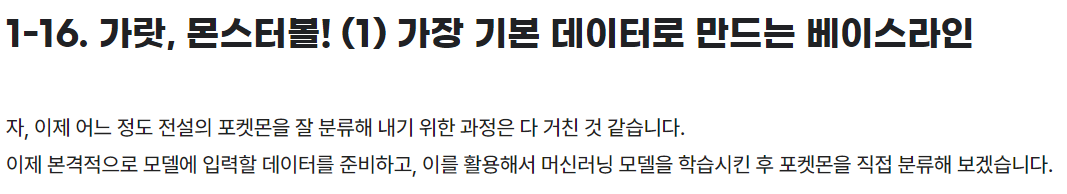

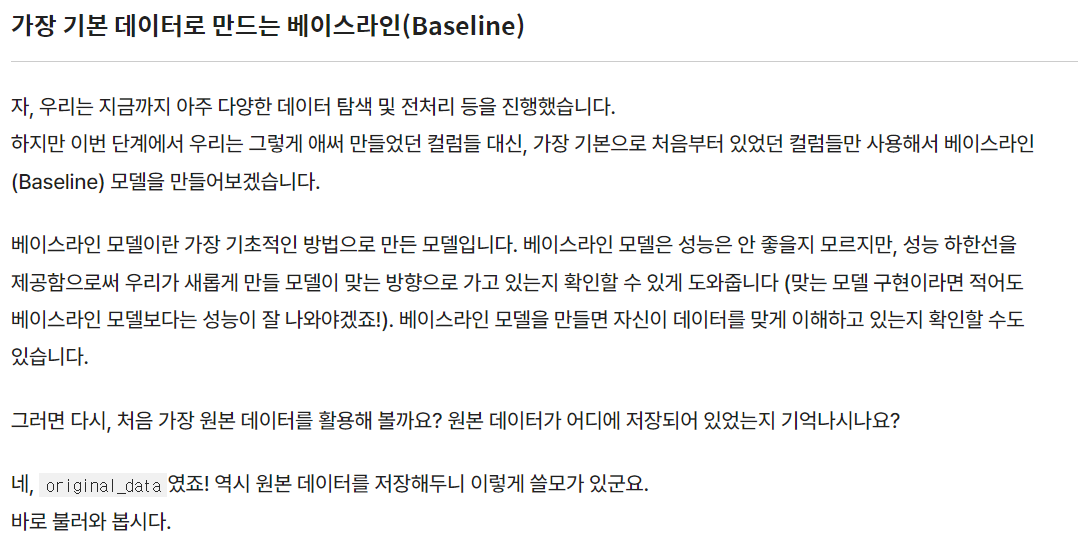

In [120]:
#기본데이터 불러오기
print(original_data.shape)
original_data.head()
#베이스라인 모델에 넣기전에 컬럼확인
original_data.columns
#문자열데이터 컬럼은 빼기
#컬럼 중 의미 없는 컬럼인 #와 문자열 데이터인 Name, Type 1, Type 2 데이터는 제외하고 사용해 보겠습니다
#target 데이터인 Legendary 또한 뺀다
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
#타겟데이터 따로 저장
target = 'Legendary'
#모델에 바로 넣어줄 수 있도록 X 변수에 features 컬럼에 해당하는 데이터를 담기
X=original_data[features]
print(X.shape)
X.head()
# y 변수에도 target 컬럼에 해당하는 데이터를 담겠습니다.
y=original_data[target]
print(y.shape)
y.head()

(800, 13)
(800, 8)
(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

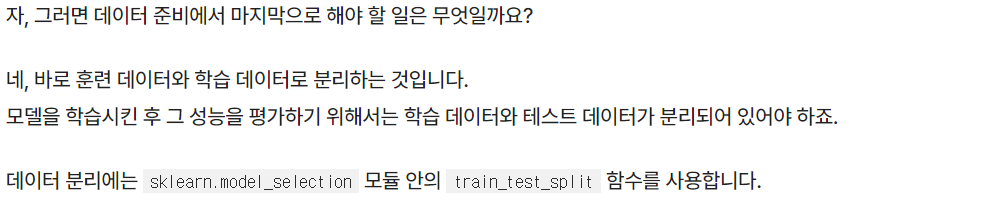

In [121]:
#데이터셋을 학습데이터와 테스트데이터로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


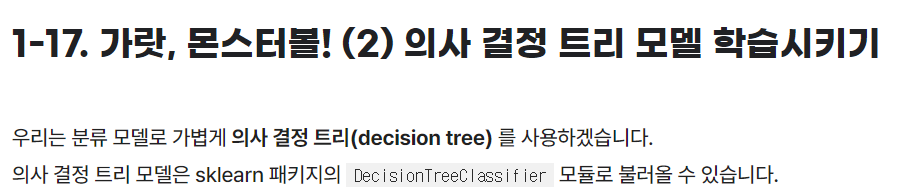

In [122]:
#의사경절나무 모델 불러오기
from sklearn.tree import DecisionTreeClassifier
#랜덤성에 의해 학습 결과가 차이 나는 것을 방지하기 위해 하나의 값으로 고정해서 실험하는 것이 좋습니다.
model = DecisionTreeClassifier(random_state=25)#모델을 model변수에 지정
#모델에 데이터 학습시키기
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

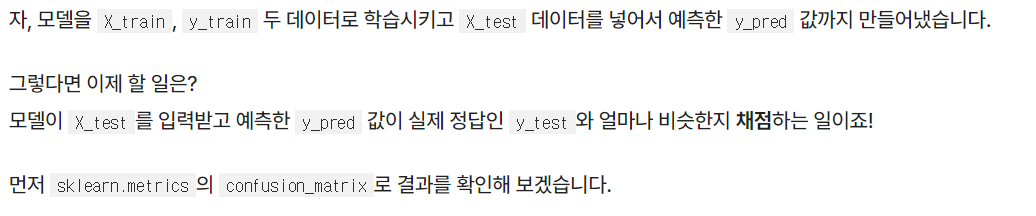

In [123]:
#confusion_matrix로 결과확인해보기
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]], dtype=int64)

#### 위에서 나타난 confusion_matrix 값들로 정확도(accuracy)를 구할 수 있을까요?
#### 정확도는 전체 데이터 중 맞은 데이터의 개수에 대한 비율입니다. 따라서 152 / 160 * 100 = 95% 이다.
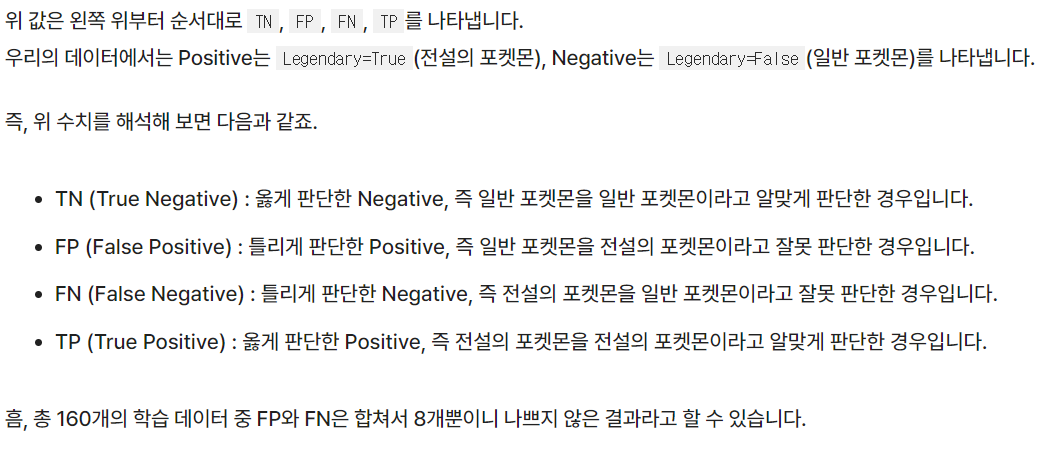


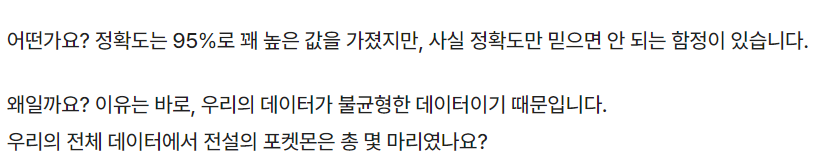

In [ ]:
#len(legendary)->65마리가 전설의 포켓몬임으로 전체800마리중에 전설의포켓몬의 비중이 낫기때문에 정확도외의 다른방법으로 모델의 성능을 알아봐야한다.
#따라서 이번 데이터셋에서는 정확도말고 다른 방법을 사용해야한다.

In [124]:
#classification_report를 사용해 다른 평가 값들도 알아보기
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



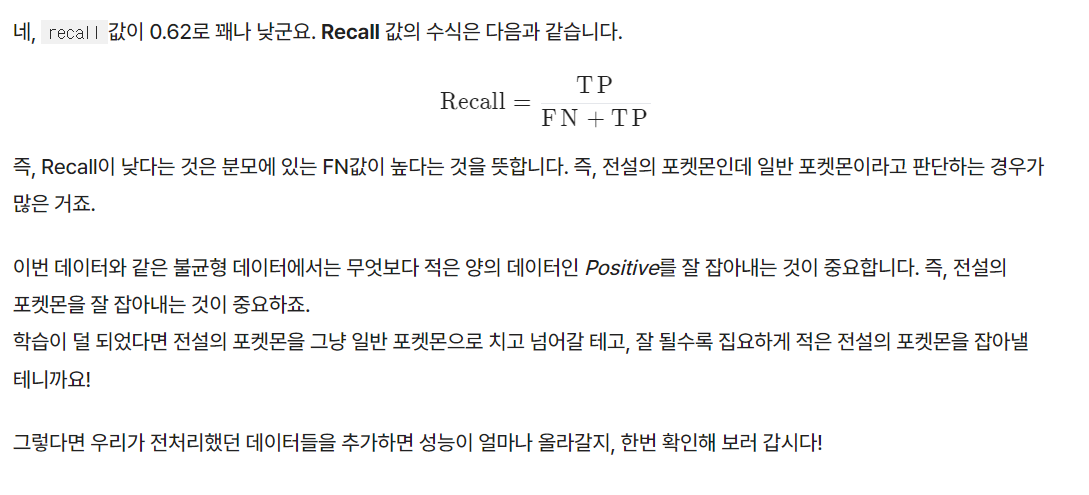

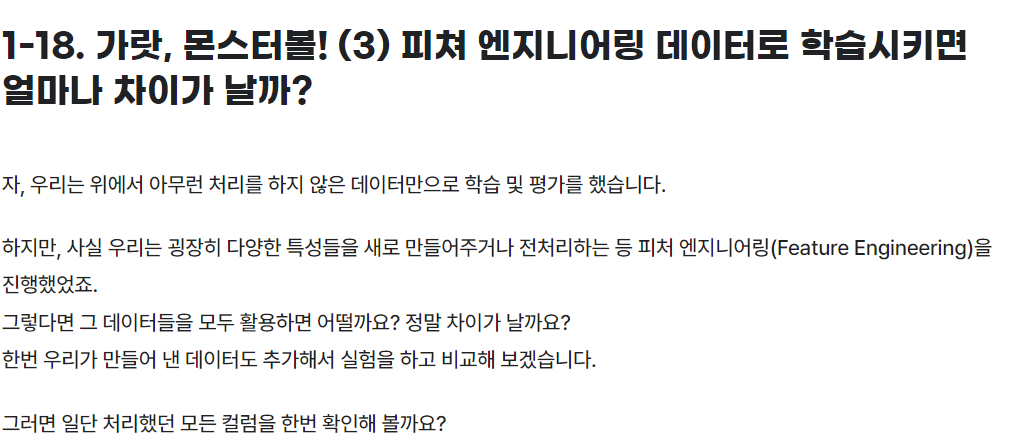

In [125]:
#데이터 전처리한 컬럼들 불러오기
print(len(pokemon.columns))
print(pokemon.columns)
#타입별로 원핫인코딩을 진행하여 원래13개였던 컬림이 47로 늘어났다.
#모델의 성능을 높이기위해 필요없는 값들,문자열로 된값들은 처리를 해야한다.

47
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Total_sum',
       'Stats_sum', 'name_count', 'long_name', 'Name_nospace', 'name_isalpha',
       'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 'Latias',
       'Latios', 'Kyogre', 'Groudon', 'Ice', 'Fighting', 'Normal', 'Rock',
       'Flying', 'Ground', 'Psychic', 'Fairy', 'Poison', 'Electric', 'Grass',
       'Bug', 'Water', 'Ghost', 'Dragon', 'Dark', 'Fire', 'Steel'],
      dtype='object')


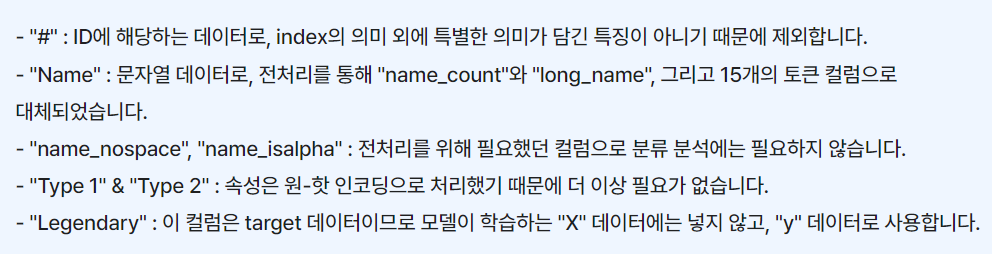

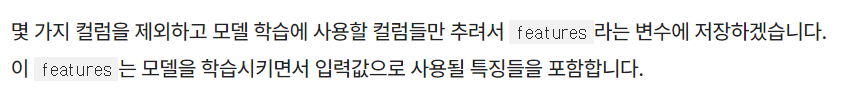

In [126]:
#필요한 컬럼들만 다시 features에 저장하기
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)#총 45개중38개의 컬럼만 남았다.

38

In [127]:
#타겟데이터 변수에 지정하기
target = "Legendary"
target

'Legendary'

In [128]:
#전처리한데이터들은 처음에 원본데이터에 복사하여 pokemon변수에 지정해주었다.
#  사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = pokemon[features]
print(X.shape)
X.head()
# 정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.
y = pokemon[target]
print(y.shape)
y.head()

(800, 38)
(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

#### 깔끔하게 숫자또는 부울형태의 데이터로 이루어진것을 알수있다.
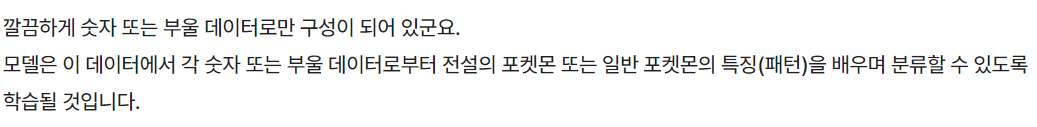

In [129]:
#데이터셋을 학습데이터와 테스트데이터로 나누기.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


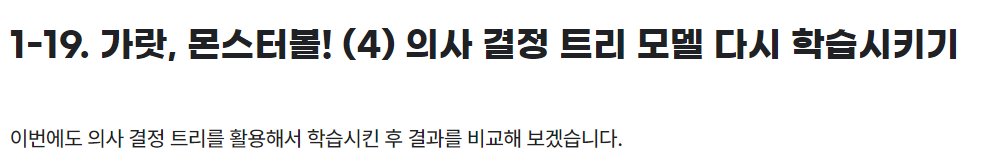

In [130]:
#모델을 변수에 지정
model = DecisionTreeClassifier(random_state=25)
model
#모델에 학습및 예측값 변수에 지정
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#confusion matrix로 결과 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
#classification_report를 사용해 다른 평가 값들도 알아보기
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



### 기본데이터로 학습후 예측했을떄값
- TN:144, FP:3,FN:5,  TP: 8
### 전처리후 데이터로 학습후 예측했을때값
- TN:141, FP:6,FN:1,  TP: 12

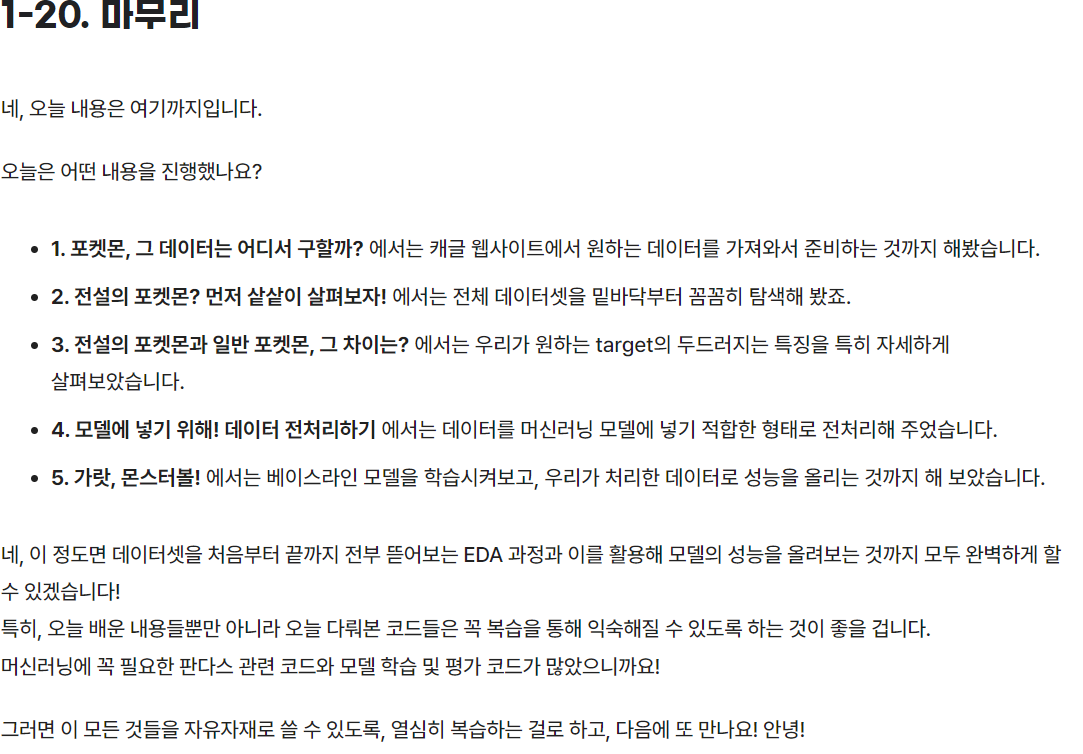

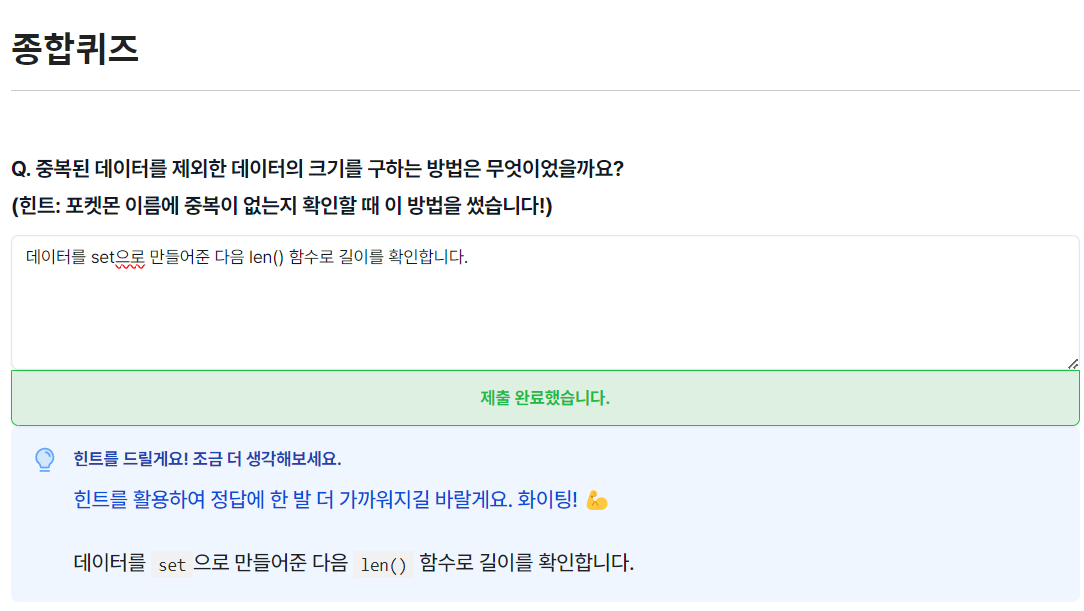

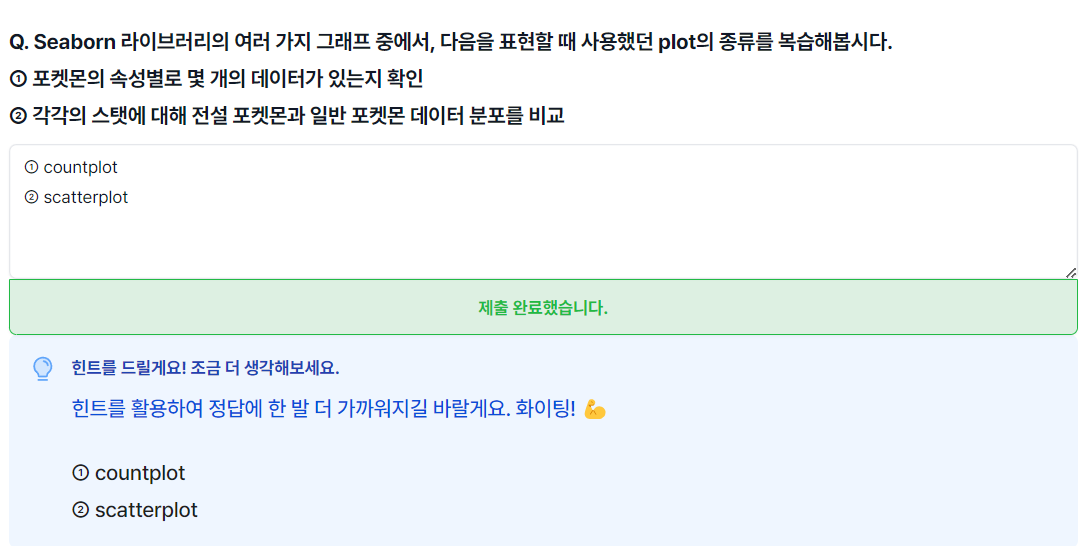